# **CRISP-DM: Projeto de Análise Educacional**

## **1. Entendimento do Negócio**
- **Objetivos do Projeto:**
  - **Análise Comparativa:** Comparar o desempenho dos alunos em diferentes regiões, escolas, ou séries.
  - **Fatores Determinantes:** Identificar os fatores que mais influenciam o desempenho dos alunos.
  - **Modelagem Preditiva:** Prever a perfomance futuro dos alunos com base em dados históricos.

- **Perguntas-Chave:**
  - Quais regiões/estados apresentam os melhores e os piores desempenhos?
  - Como variáveis como infraestrutura escolar, formação dos professores e características socioeconômicas impactam o desempenho dos alunos?
  - É possível prever a perfomance futuro dos alunos com base nos dados históricos?

## **2. Entendimento dos Dados**
- **Descrição dos Dados:**
  - O dataset contém informações detalhadas sobre o desempenho dos alunos, infraestrutura das escolas, localização, e outros fatores relevantes.
 
  - 
### Tabela de Variáveis (Traduzida):

|     | Nome da Coluna            | Descrição                                              | Tipo de Dado  |
| --- | ------------------------- | ------------------------------------------------------ | ------------- |
| 0   | ano                       | Ano de coleta dos dados                                | int64         |
| 1   | id_regiao                 | ID da região                                           | int64         |
| 2   | sigla_uf                  | Sigla do estado (UF)                                   | object        |
| 3   | id_municipio              | ID do município                                        | int64         |
| 4   | area                      | Área (rural/urbana)                                    | int64         |
| 5   | id_escola                 | ID da escola                                           | int64         |
| 6   | rede                      | Rede de ensino (1 = pública, 2 = privada)              | float64       |
| 7   | localizacao               | Localização (1 = urbana, 2 = rural)                    | int64         |
| 8   | id_turma                  | ID da turma                                            | int64         |
| 9   | turno                     | Turno da turma (1 = manhã, 2 = tarde, etc.)            | float64       |
| 10  | serie                     | Série escolar                                          | int64         |
| 11  | id_aluno                  | ID do aluno                                            | int64         |
| 12  | situacao_censo            | Situação do aluno no censo escolar                     | int64         |
| 13  | disciplina                | Disciplina (matemática, português, etc.)               | object        |
| 14  | preenchimento_caderno     | Indicador de preenchimento do caderno                  | int64         |
| 15  | presenca                  | Indicador de presença                                  | int64         |
| 16  | caderno                   | Tipo de caderno de avaliação                           | int64         |
| 17  | bloco_1                   | Respostas do bloco 1                                   | int64         |
| 18  | bloco_2                   | Respostas do bloco 2                                   | int64         |
| 19  | bloco_1_aberto            | Questões abertas do bloco 1                            | int64         |
| 20  | bloco_2_aberto            | Questões abertas do bloco 2                            | int64         |
| 21  | respostas_bloco_1         | Respostas completas do bloco 1                         | float64       |
| 22  | respostas_bloco_2         | Respostas completas do bloco 2                         | float64       |
| 23  | conceito_q1               | Conceito na questão 1                                  | object        |
| 24  | conceito_q2               | Conceito na questão 2                                  | object        |
| 25  | resposta_texto            | Resposta textual                                       | object        |
| 26  | conceito_proposito        | Conceito sobre propósito                               | object        |
| 27  | conceito_elemento         | Conceito sobre elementos                               | object        |
| 28  | conceito_segmentacao      | Conceito sobre segmentação                             | object        |
| 29  | texto_grafia              | Análise da grafia do texto                             | object        |
| 30  | indicador_proficiencia    | Indicador de proficiência dos alunos                   | int64         |
| 31  | amostra                   | Indicador de amostra                                   | int64         |
| 32  | estrato                   | Estrato da amostra                                     | int64         |
| 33  | peso_aluno                | Peso do aluno na amostra                               | float64       |
| 34  | proficiencia              | Nível de proficiência do aluno                         | float64       |
| 35  | erro_padrao               | Erro padrão na avaliação da proficiência               | float64       |
| 36  | proficiencia_saeb         | Nível de proficiência SAEB (Sistema de Avaliação)      | float64       |
| 37  | erro_padrao_saeb          | Erro padrão do nível de proficiência SAEB              | float64       |


# Bibliotecas

In [301]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import joblib
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer  
from wordcloud import WordCloud

# Carregando os dados

In [304]:
df=pd.read_csv("br_inep_saeb_aluno_ef_2ano.csv", na_values="na")

display(df)

,ano,id_regiao,sigla_uf,id_municipio,area,id_escola,rede,localizacao,id_turma,turno,...,conceito_segmentacao,texto_grafia,indicador_proficiencia,amostra,estrato,peso_aluno,proficiencia,erro_padrao,proficiencia_saeb,erro_padrao_saeb
0,2021,1,TO,6317045,2,61394315,NaN,1,1387439,NaN,...,.,.,0,1,17312,NaN,NaN,NaN,NaN,NaN
1,2021,1,TO,6317045,2,61394315,NaN,1,1387439,NaN,...,NaN,NaN,0,1,17312,NaN,NaN,NaN,NaN,NaN
2,2021,1,TO,6317045,2,61394315,NaN,1,1387439,NaN,...,NaN,NaN,0,1,17312,NaN,NaN,NaN,NaN,NaN
3,2021,1,TO,6317045,2,61394315,NaN,1,1387439,NaN,...,NaN,NaN,0,1,17312,NaN,NaN,NaN,NaN,NaN
4,2021,1,TO,6317045,2,61394315,NaN,1,1387439,NaN,...,.,.,0,1,17312,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231209,2019,3,RJ,6314293,2,61312254,3.0,1,1198326,1.0,...,A,A,1,1,33312,109.592502,0.506275,0.391827,776.273706,21.709695
231210,2019,3,RJ,6314293,2,61312254,3.0,1,1198326,1.0,...,B,A,1,1,33312,109.592502,-0.561617,0.321862,717.105731,17.833192
231211,2019,3,RJ,6314293,2,61312254,3.0,1,1198326,1.0,...,A,A,1,1,33312,109.592502,-0.453720,0.301303,723.083908,16.694093
231212,2019,3,RJ,6314293,2,61312254,3.0,1,1198326,1.0,...,B,A,1,1,33312,109.592502,-0.179863,0.328719,738.257319,18.213113


In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231214 entries, 0 to 231213
Data columns (total 38 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ano                     231214 non-null  int64  
 1   id_regiao               231214 non-null  int64  
 2   sigla_uf                231214 non-null  object 
 3   id_municipio            231214 non-null  int64  
 4   area                    231214 non-null  int64  
 5   id_escola               231214 non-null  int64  
 6   rede                    171576 non-null  float64
 7   localizacao             231214 non-null  int64  
 8   id_turma                231214 non-null  int64  
 9   turno                   171576 non-null  float64
 10  serie                   231214 non-null  int64  
 11  id_aluno                231214 non-null  int64  
 12  situacao_censo          231214 non-null  int64  
 13  disciplina              231214 non-null  object 
 14  preenchimento_cadern

In [308]:
df.shape

(231214, 38)

# Limpeza de dados e tratamento

In [311]:
# Lista de colunas a serem removidas
columns_to_drop = [
    'id_regiao', 'id_municipio', 'id_escola', 'id_turma', 'id_aluno',
]
# Remover colunas não necessárias
df= df.drop(columns=columns_to_drop)

# Verificar o DataFrame reduzido
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231214 entries, 0 to 231213
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ano                     231214 non-null  int64  
 1   sigla_uf                231214 non-null  object 
 2   area                    231214 non-null  int64  
 3   rede                    171576 non-null  float64
 4   localizacao             231214 non-null  int64  
 5   turno                   171576 non-null  float64
 6   serie                   231214 non-null  int64  
 7   situacao_censo          231214 non-null  int64  
 8   disciplina              231214 non-null  object 
 9   preenchimento_caderno   231214 non-null  int64  
 10  presenca                231214 non-null  int64  
 11  caderno                 231214 non-null  int64  
 12  bloco_1                 231214 non-null  int64  
 13  bloco_2                 231214 non-null  int64  
 14  bloco_1_aberto      

In [313]:
# Verificar se existem duplicatas no DataFrame
duplicatas = df.duplicated().sum()
print(f"\nNúmero de linhas duplicadas: {duplicatas}")


Número de linhas duplicadas: 53417


In [315]:
# Remover linhas duplicadas
df = df.drop_duplicates()

# Verificar o número de linhas duplicadas removidas
duplicatas_removidas = df.shape[0] - df.shape[0]
print(f"\nNúmero de linhas duplicadas removidas: {duplicatas_removidas}")

# Verificar se ainda existem duplicatas
duplicatas_restantes = df.duplicated().sum()
print(f"\nNúmero de linhas duplicadas restantes: {duplicatas_restantes}")



Número de linhas duplicadas removidas: 0

Número de linhas duplicadas restantes: 0


In [316]:
# Verificar valores nulos em cada coluna
nulos_por_coluna = df.isnull().sum()
print("Valores nulos por coluna:")
print(nulos_por_coluna)

Valores nulos por coluna:
ano                            0
sigla_uf                       0
area                           0
rede                       37296
localizacao                    0
turno                      37296
serie                          0
situacao_censo                 0
disciplina                     0
preenchimento_caderno          0
presenca                       0
caderno                        0
bloco_1                        0
bloco_2                        0
bloco_1_aberto                 0
bloco_2_aberto                 0
respostas_bloco_1         177797
respostas_bloco_2         177797
conceito_q1                    0
conceito_q2                    0
resposta_texto                 0
conceito_proposito         91165
conceito_elemento          91165
conceito_segmentacao       91165
texto_grafia               91165
indicador_proficiencia         0
amostra                        0
estrato                        0
peso_aluno                 13195
proficiencia     

#  Distribuição das Variáveis Contínuas

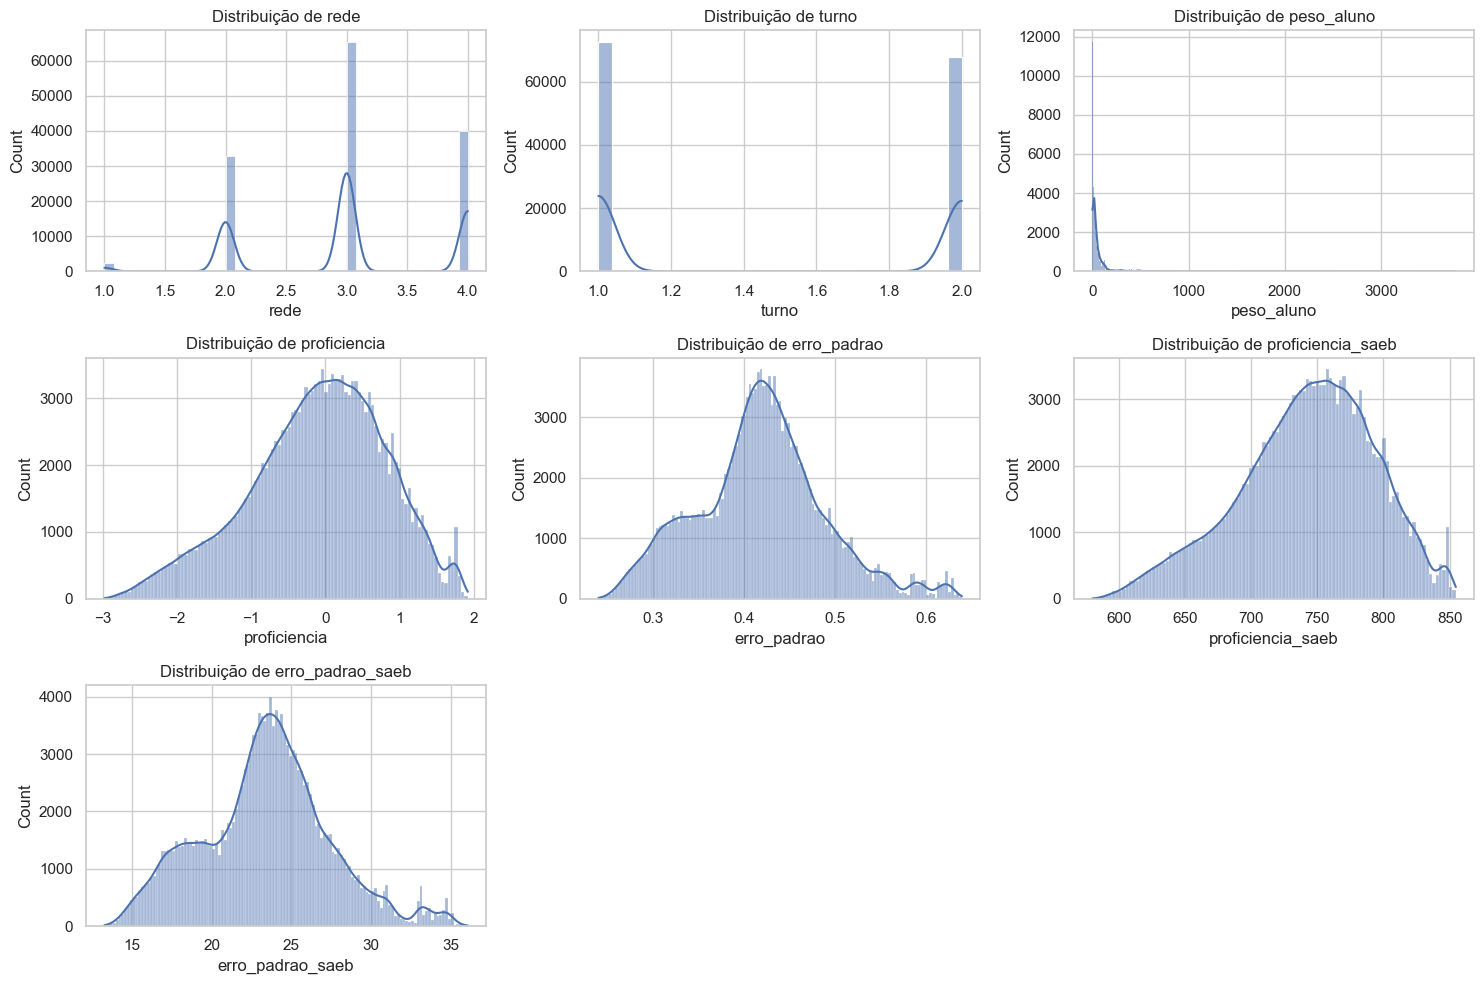

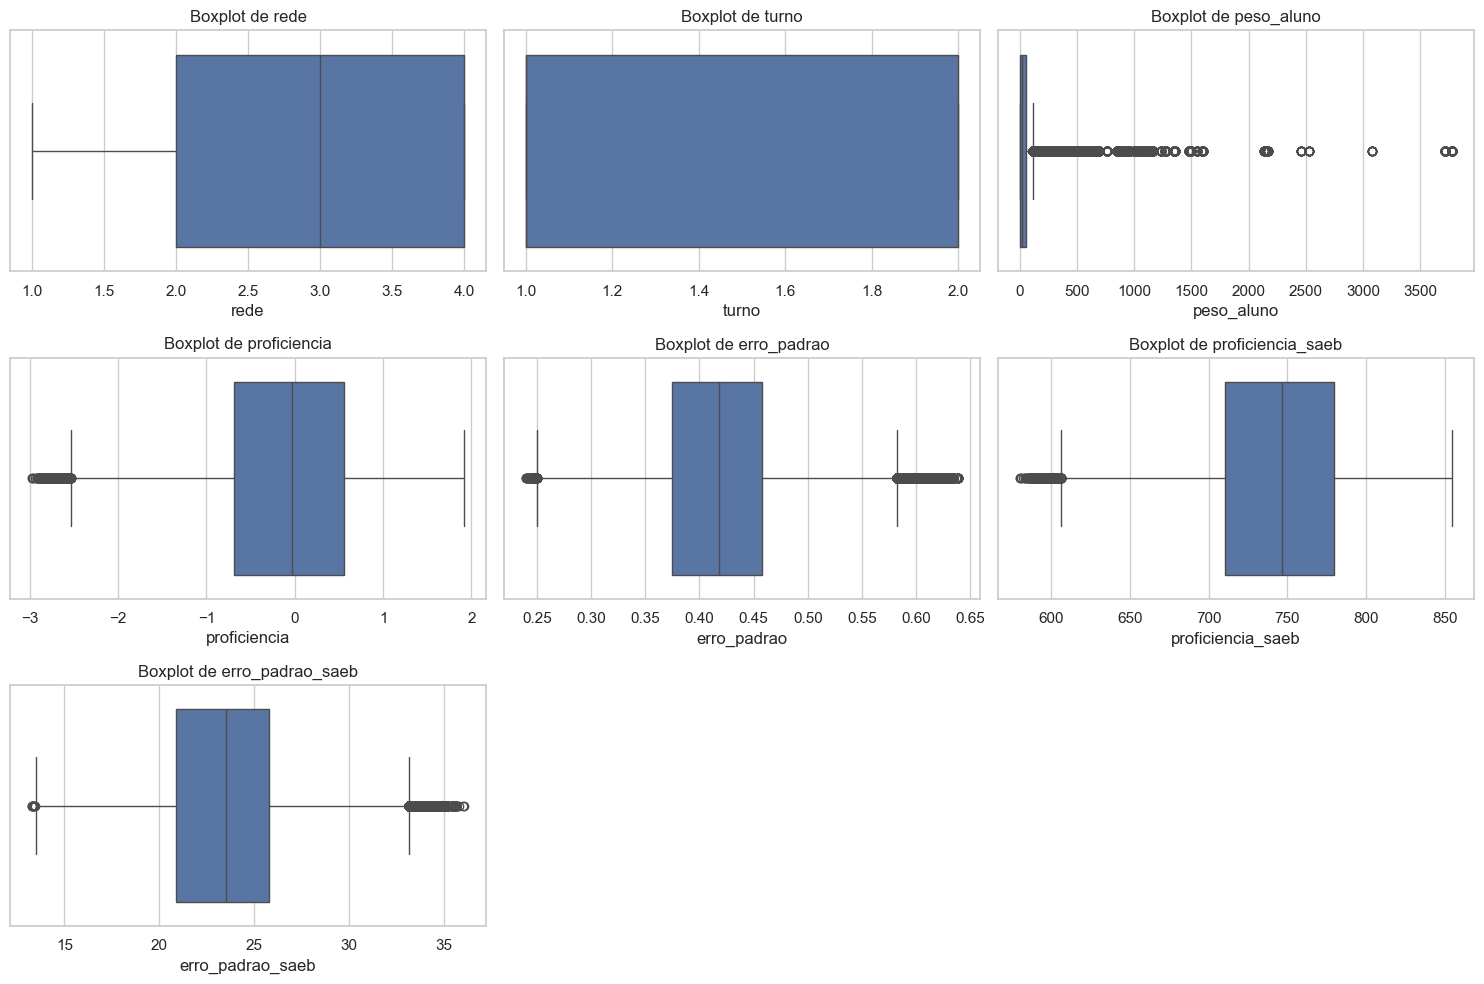

In [320]:
# Variáveis contínuas
variaveis_continuas = ['rede', 'turno', 'peso_aluno', 'proficiencia', 'erro_padrao', 'proficiencia_saeb', 'erro_padrao_saeb']

# Histograma
plt.figure(figsize=(15, 10))
for i, var in enumerate(variaveis_continuas):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[var].dropna(), kde=True)
    plt.title(f'Distribuição de {var}')
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(15, 10))
for i, var in enumerate(variaveis_continuas):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')
plt.tight_layout()
plt.show()


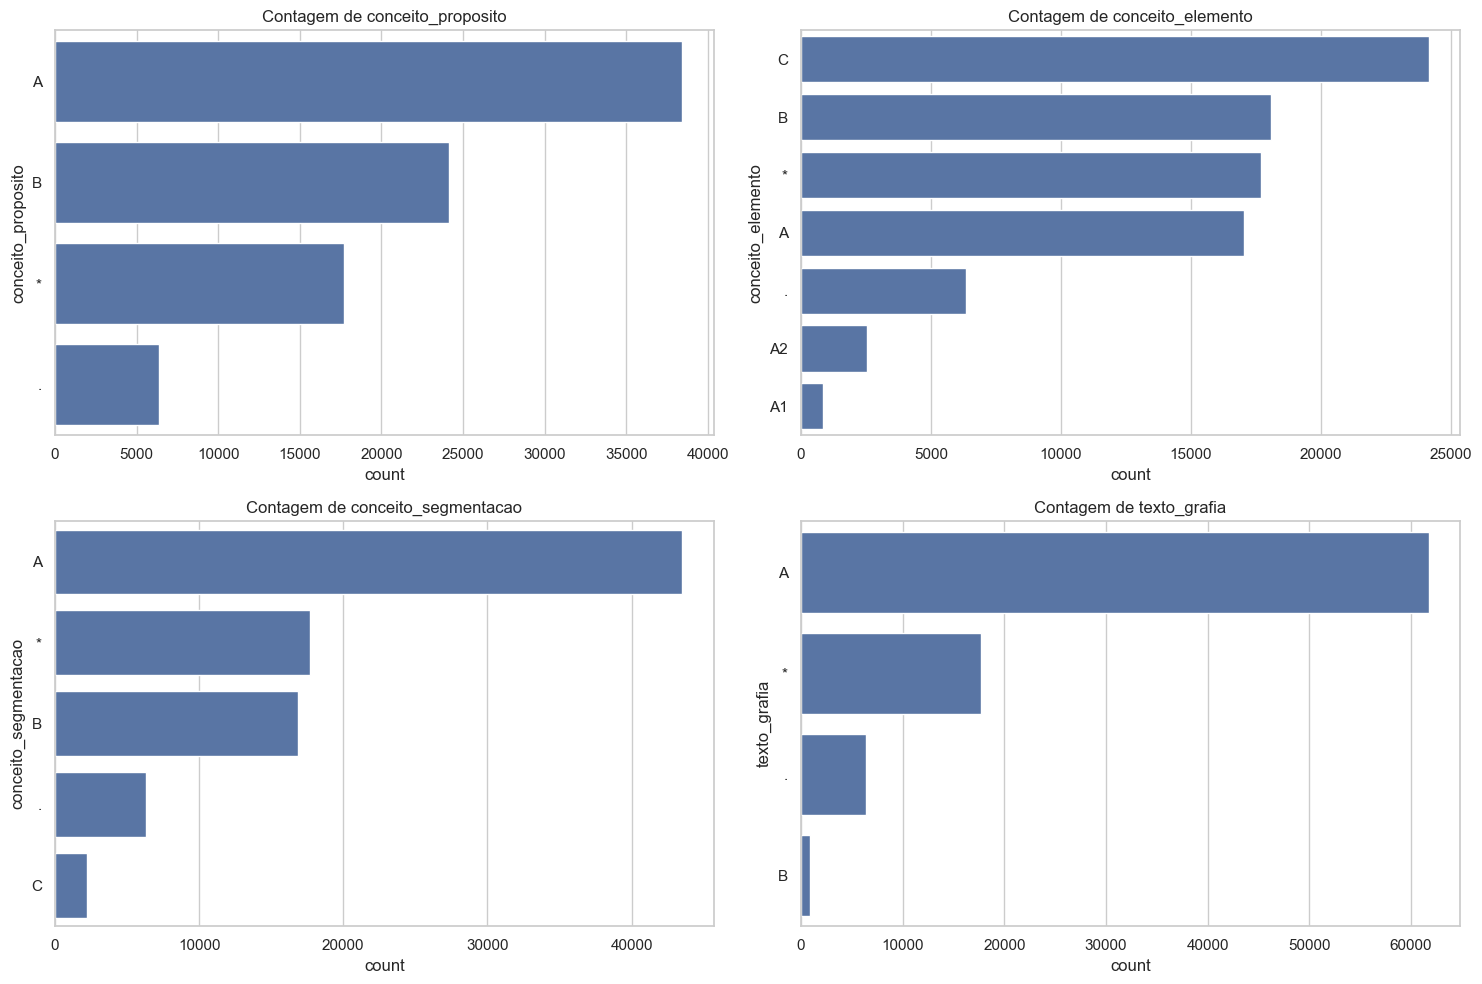

In [322]:
# Variáveis categóricas
variaveis_categoricas = ['conceito_proposito', 'conceito_elemento', 'conceito_segmentacao', 'texto_grafia']

plt.figure(figsize=(15, 10))
for i, var in enumerate(variaveis_categoricas):
    plt.subplot(2, 2, i + 1)
    sns.countplot(y=df[var], order=df[var].value_counts().index)
    plt.title(f'Contagem de {var}')
plt.tight_layout()
plt.show()


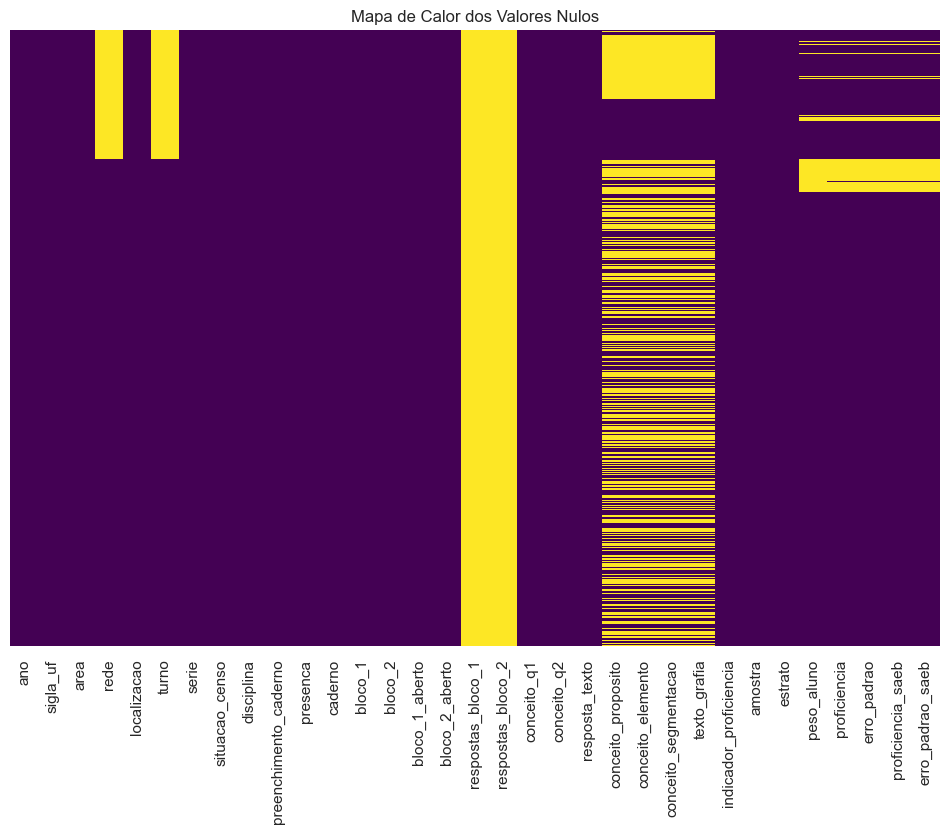

In [323]:
# Mapa de calor dos valores nulos
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Mapa de Calor dos Valores Nulos')
plt.show()


In [324]:
# Estatísticas descritivas
print(df[variaveis_continuas].describe())


                rede          turno     peso_aluno   proficiencia  \
count  140501.000000  140501.000000  164602.000000  165125.000000   
mean        3.017758       1.483207      60.736186      -0.107479   
std         0.765310       0.499720     172.422884       0.916142   
min         1.000000       1.000000       0.785185      -2.980093   
25%         2.000000       1.000000       7.888819      -0.683435   
50%         3.000000       1.000000      21.396994      -0.031315   
75%         4.000000       2.000000      52.625746       0.553205   
max         4.000000       2.000000    3778.146400       1.920608   

         erro_padrao  proficiencia_saeb  erro_padrao_saeb  
count  165125.000000      165125.000000     165125.000000  
mean        0.417562         742.433173         23.388418  
std         0.070079          51.245648          4.005402  
min         0.239568         580.177072         13.273583  
25%         0.374816         710.177673         20.847407  
50%         0.4183

A partir das estatísticas descritivas podemos fazer as seguintes observações para tomar decisão de como tratar os valores nulos:

### 1. **Distribuição das Variáveis Contínuas**

#### **Variáveis `rede` e `turno`**
- **`rede`**: Variável contínua com valores que variam entre 1 e 4, com a média de cerca de 3 e desvio padrão de aproximadamente 0.77. Parece que `rede` pode ter uma distribuição relativamente uniforme, mas é um pouco mais concentrada em valores mais baixos.
- **`turno`**: Variável contínua também com valores entre 1 e 2, com a média perto de 1.48. Isso sugere que a maior parte dos dados está mais concentrada no valor 1.

#### **Variáveis `peso_aluno`, `proficiencia`, `erro_padrao`, `proficiencia_saeb`, e `erro_padrao_saeb`**
- **`peso_aluno`**: Tem uma média bastante alta (60.74) e uma grande variabilidade (desvio padrão de 172.42). A mediana (21.40) é bem menor que a média, o que indica que há uma distribuição assimétrica com muitos valores extremos.
- **`proficiencia`**: Média negativa com uma grande variação, sugerindo que a proficiência é medida em uma escala onde valores negativos podem representar uma baixa proficiência.
- **`erro_padrao`, `proficiencia_saeb`, e `erro_padrao_saeb`**: Todas têm uma variação significativa com médias e desvios padrão que indicam a necessidade de tratamento cuidadoso para os valores nulos.

### 2. **Tratamento dos Valores Nulos**

Para lidar com valores nulos, considere os seguintes métodos com base na análise acima:

1. **Para `rede` e `turno`**:
   - **Remoção e Mediana**: Dado que `rede` tem uma distribuição relativamente uniforme e `turno` é mais concentrado, decidir remover os valores nulos para não distorcer as informações, enquanto a mediana pode ser mais apropriada para `turno`com distribuição mais assimétrica.

2. **Para `peso_aluno`**:
   - **Mediana**: Devido à alta variabilidade e à presença de outliers, a mediana é mais robusta para preencher valores nulos, pois não é tão afetada por valores extremos.

3. **Para `proficiencia`, `erro_padrao`, `proficiencia_saeb`, e `erro_padrao_saeb`**:
   - **Média**: Essas variáveis têm distribuições que podem ser aproximadas pela média, especialmente se a distribuição não for fortemente assimétrica.



In [326]:
# Remover linhas com valores ausentes na coluna 'rede'
df = df.dropna(subset=['rede'])

# Preencher valores nulos para variáveis contínuas
df['turno'] = df['turno'].fillna(df['turno'].median())
df['peso_aluno'] = df['peso_aluno'].fillna(df['peso_aluno'].median())

# Preencher valores nulos em múltiplas variáveis contínuas com a média
df[['proficiencia', 'erro_padrao', 'proficiencia_saeb', 'erro_padrao_saeb']] = df[['proficiencia', 'erro_padrao', 'proficiencia_saeb', 'erro_padrao_saeb']].fillna(df[['proficiencia', 'erro_padrao', 'proficiencia_saeb', 'erro_padrao_saeb']].mean())

# Verificar valores nulos após imputação
null_counts = df.isnull().sum()

# Exibir resultados
print("Valores nulos por coluna após imputação:")
print(null_counts)

Valores nulos por coluna após imputação:
ano                            0
sigla_uf                       0
area                           0
rede                           0
localizacao                    0
turno                          0
serie                          0
situacao_censo                 0
disciplina                     0
preenchimento_caderno          0
presenca                       0
caderno                        0
bloco_1                        0
bloco_2                        0
bloco_1_aberto                 0
bloco_2_aberto                 0
respostas_bloco_1         140501
respostas_bloco_2         140501
conceito_q1                    0
conceito_q2                    0
resposta_texto                 0
conceito_proposito         72120
conceito_elemento          72120
conceito_segmentacao       72120
texto_grafia               72120
indicador_proficiencia         0
amostra                        0
estrato                        0
peso_aluno                     0
pr

In [327]:
# Preencher valores nulos nas colunas com uma string padrão
df['conceito_proposito'] = df['conceito_proposito'].fillna('Não Informado')
df['conceito_elemento'] = df['conceito_elemento'].fillna('Não Informado')
df['conceito_segmentacao'] = df['conceito_segmentacao'].fillna('Não Informado')
df['texto_grafia'] = df['texto_grafia'].fillna('Não Informado')

# Preencher valores nulos com zero e atribuir o resultado de volta ao DataFrame
df['respostas_bloco_1'] = df['respostas_bloco_1'].fillna(0)
df['respostas_bloco_2'] = df['respostas_bloco_2'].fillna(0)

# Verificar se os valores nulos foram preenchidos
print(df[['respostas_bloco_1', 'respostas_bloco_2']].isnull().sum())


# Verifique se os valores nulos foram tratados
print(df.isnull().sum())


respostas_bloco_1    0
respostas_bloco_2    0
dtype: int64
ano                       0
sigla_uf                  0
area                      0
rede                      0
localizacao               0
turno                     0
serie                     0
situacao_censo            0
disciplina                0
preenchimento_caderno     0
presenca                  0
caderno                   0
bloco_1                   0
bloco_2                   0
bloco_1_aberto            0
bloco_2_aberto            0
respostas_bloco_1         0
respostas_bloco_2         0
conceito_q1               0
conceito_q2               0
resposta_texto            0
conceito_proposito        0
conceito_elemento         0
conceito_segmentacao      0
texto_grafia              0
indicador_proficiencia    0
amostra                   0
estrato                   0
peso_aluno                0
proficiencia              0
erro_padrao               0
proficiencia_saeb         0
erro_padrao_saeb          0
dtype: int64


## Distribuição nas Variáveis contínuas

In [329]:
# Estatísticas descritivas
print(df[variaveis_continuas].describe())

                rede          turno     peso_aluno   proficiencia  \
count  140501.000000  140501.000000  140501.000000  140501.000000   
mean        3.017758       1.483207      37.233249      -0.057725   
std         0.765310       0.499720      57.927380       0.848453   
min         1.000000       1.000000       0.785185      -2.980093   
25%         2.000000       1.000000       8.810947      -0.552684   
50%         3.000000       1.000000      20.002010      -0.057725   
75%         4.000000       2.000000      41.343216       0.525262   
max         4.000000       2.000000     542.328960       1.884963   

         erro_padrao  proficiencia_saeb  erro_padrao_saeb  
count  140501.000000      140501.000000     140501.000000  
mean        0.417154         745.204753         23.366081  
std         0.067462          47.477121          3.856020  
min         0.239568         580.177072         13.273583  
25%         0.379345         717.491525         21.128925  
50%         0.4171

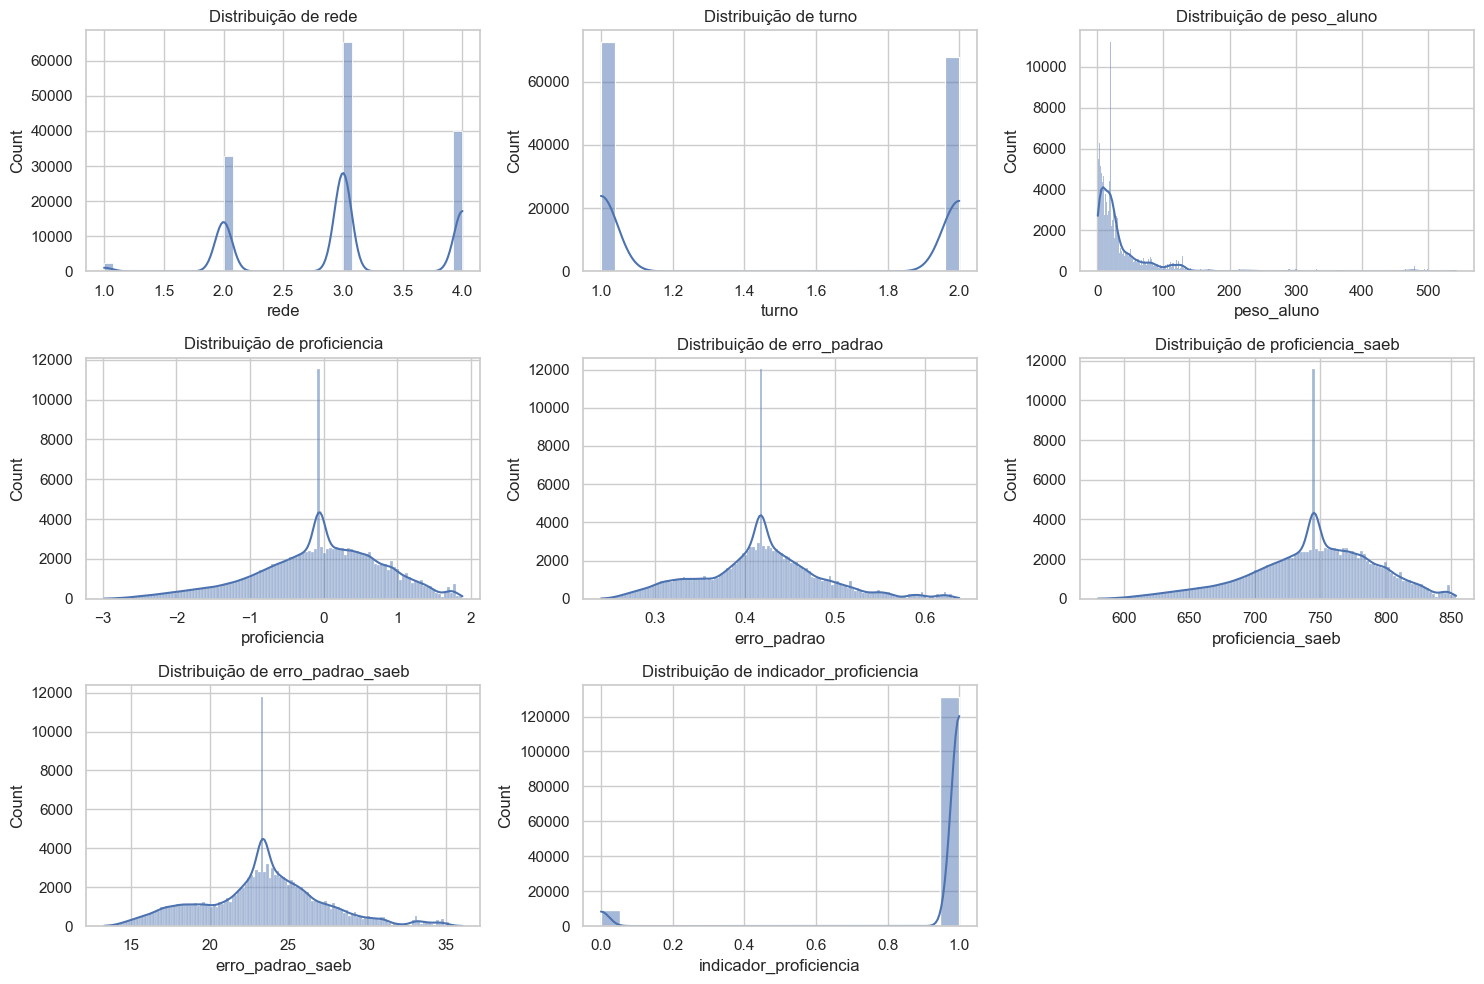

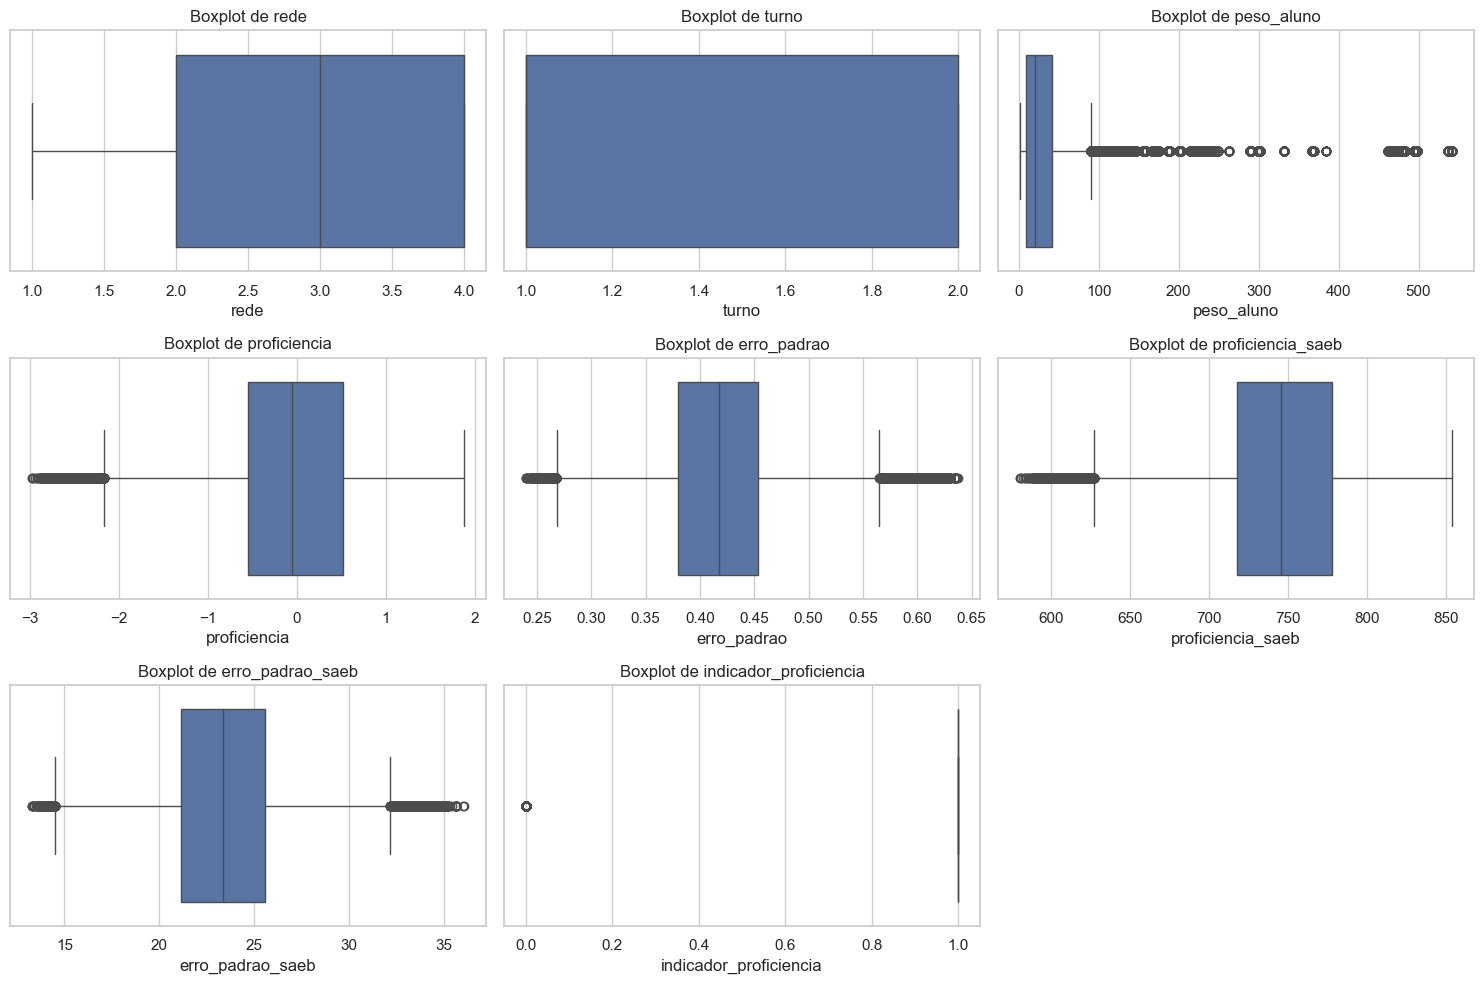

In [330]:
# Variáveis contínuas
variaveis_continuas = ['rede', 'turno', 'peso_aluno', 'proficiencia', 'erro_padrao', 'proficiencia_saeb', 'erro_padrao_saeb',  'indicador_proficiencia',]

# Histograma
plt.figure(figsize=(15, 10))
for i, var in enumerate(variaveis_continuas):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[var].dropna(), kde=True)
    plt.title(f'Distribuição de {var}')
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(15, 10))
for i, var in enumerate(variaveis_continuas):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')
plt.tight_layout()
plt.show()


# Tratando Outliers

In [332]:
# Função para identificar outliers usando o intervalo interquartílico (IQR)
def filter_outliers_iqr(df, columns):
    filtered_df = df.copy()
    for col in columns:
        # Calcular o primeiro e terceiro quartis
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Filtrar os dados para remover outliers
        filtered_df = filtered_df[(filtered_df[col] >= (Q1 - 1.5 * IQR)) & 
                                  (filtered_df[col] <= (Q3 + 1.5 * IQR))]
    return filtered_df

# Lista de colunas para verificar outliers
columns_to_check = ['area', 'localizacao', 'turno', 'peso_aluno', 'rede', 'indicador_proficiencia',
                    'peso_aluno', 'proficiencia', 'erro_padrao', 'proficiencia_saeb', 'erro_padrao_saeb']
                    

# Filtrar outliers usando o método IQR
df_filtered = filter_outliers_iqr(df, columns_to_check)

# Exibir o número de linhas antes e depois da filtragem
print("Número de linhas antes da filtragem por IQR:", len(df))
print("Número de linhas após a filtragem por IQR:", len(df_filtered))


Número de linhas antes da filtragem por IQR: 140501
Número de linhas após a filtragem por IQR: 97475


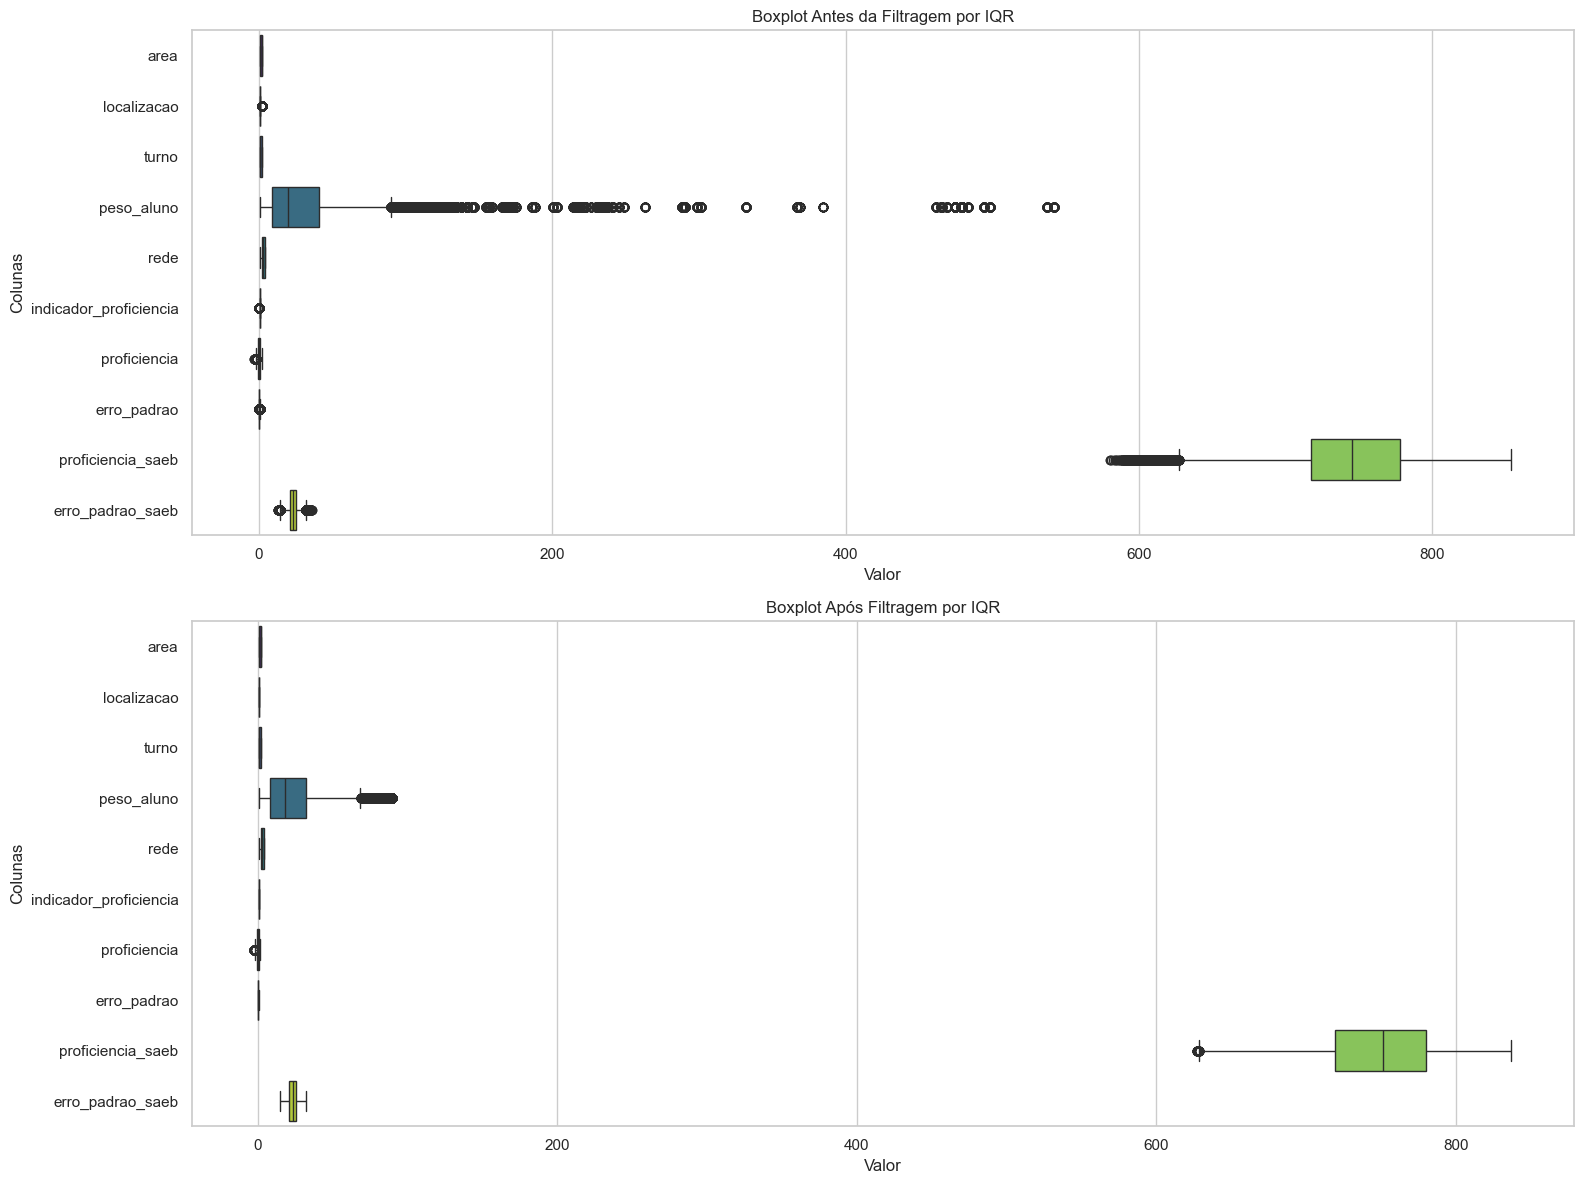

In [333]:
# Lista de colunas para verificar outliers
columns_to_check = ['area', 'localizacao', 'turno', 'peso_aluno', 'rede', 'indicador_proficiencia',
                    'proficiencia', 'erro_padrao', 'proficiencia_saeb', 'erro_padrao_saeb']

# Criar uma figura com subplots
plt.figure(figsize=(16, 12))

# Plotar boxplots para os dados originais
plt.subplot(2, 1, 1)
sns.boxplot(data=df[columns_to_check], orient='h', palette='viridis')
plt.title('Boxplot Antes da Filtragem por IQR')
plt.xlabel('Valor')
plt.ylabel('Colunas')

# Plotar boxplots para os dados filtrados
plt.subplot(2, 1, 2)
sns.boxplot(data=df_filtered[columns_to_check], orient='h', palette='viridis')
plt.title('Boxplot Após Filtragem por IQR')
plt.xlabel('Valor')
plt.ylabel('Colunas')

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


### Boxplot Antes da Filtragem por IQR
- **Distribuição Ampla**: Os dados apresentam uma ampla distribuição com muitos valores atípicos, especialmente em direção ao extremo superior do eixo x.
- **Variabilidade Alta**: Cada categoria ('localizacao', 'tamanho', 'profundidade', 'perfis_acesso', 'entropia_saida') mostra uma grande variabilidade nos dados.

### Boxplot Após a Filtragem por IQR
- **Distribuição Condensada**: Após a filtragem pelo IQR, a distribuição dos dados se torna mais condensada, com menos valores atípicos.
- **Redução de Variabilidade**: A filtragem reduziu a variabilidade, tornando os dados mais consistentes e menos dispersos.

A filtragem pelo IQR ajudou a remover valores extremos, proporcionando uma visão mais clara e precisa dos dados centrais. 

# Análise Exploratória

## 1. Análise Comparativa de Desempenho

## Desempenho por Estado
Objetivo: Identificar quais estados têm os melhores e piores desempenhos.

Análise: Comparar a média de proficiência (proficiencia_saeb) e outros indicadores de desempenho (indicador_proficiencia) entre diferentes estados (sigla_uf).

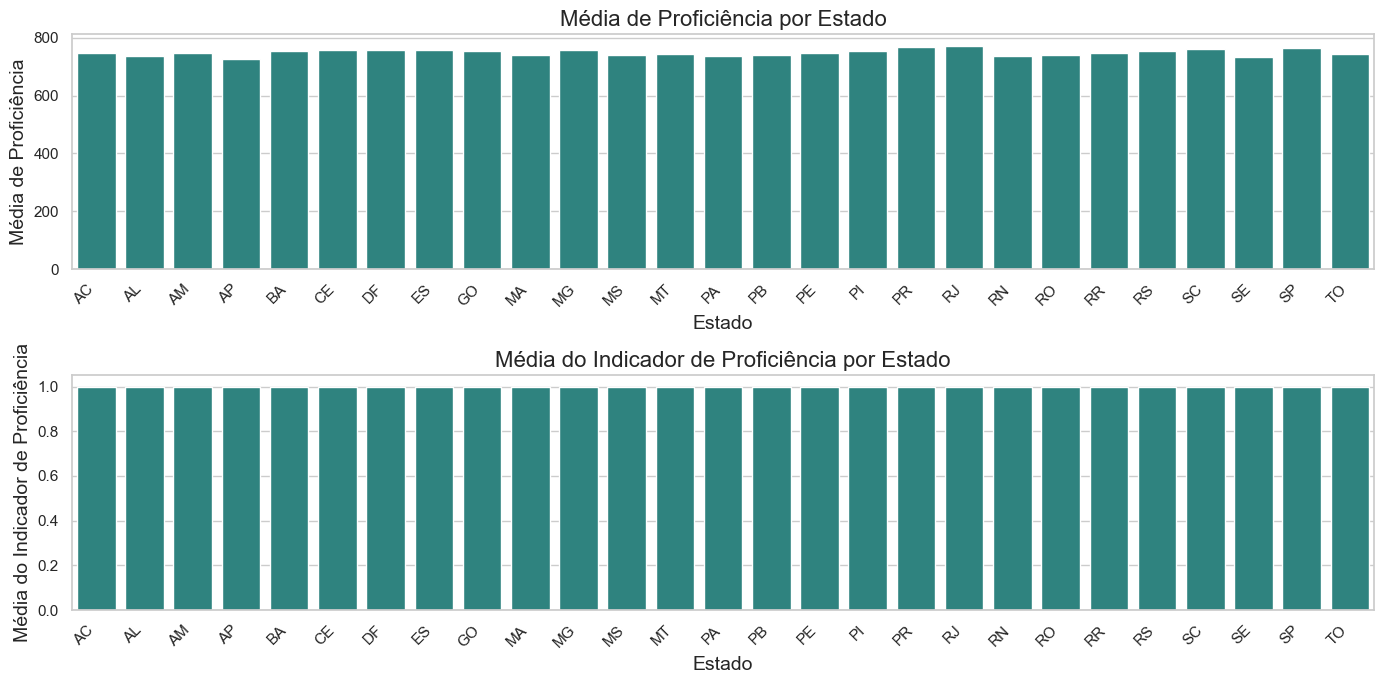

In [339]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular médias de proficiência e indicador de proficiência por estado
state_performance = df_filtered.groupby(['sigla_uf'])[['proficiencia_saeb', 'indicador_proficiencia']].mean().reset_index()

# Adicionar uma coluna dummy para evitar o aviso sobre o palette
state_performance['dummy'] = 1

# Plotar desempenho por estado
plt.figure(figsize=(14, 7))

# Plotar média de proficiência por estado
plt.subplot(2, 1, 1)
sns.barplot(data=state_performance, x='sigla_uf', y='proficiencia_saeb', hue='dummy', palette='viridis', legend=False)
plt.title('Média de Proficiência por Estado', fontsize=16)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Média de Proficiência', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Plotar indicador de proficiência por estado
plt.subplot(2, 1, 2)
sns.barplot(data=state_performance, x='sigla_uf', y='indicador_proficiencia', hue='dummy', palette='viridis', legend=False)
plt.title('Média do Indicador de Proficiência por Estado', fontsize=16)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Média do Indicador de Proficiência', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


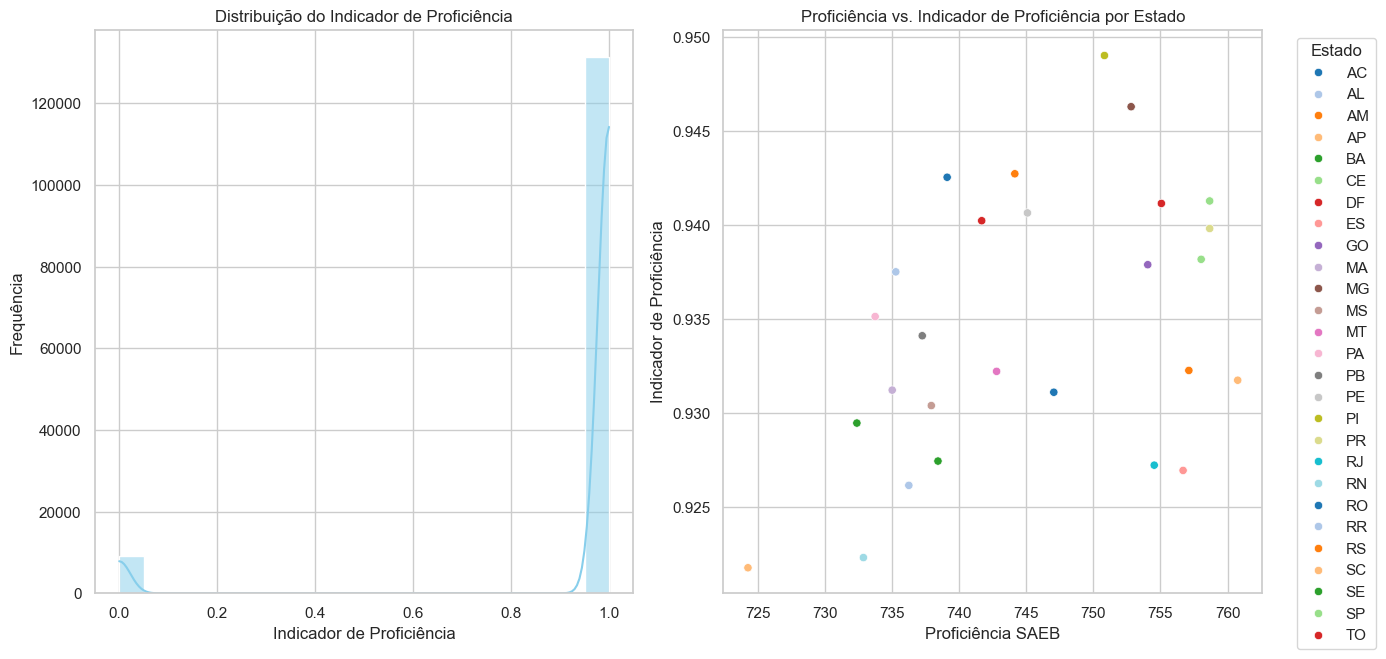

   sigla_uf  proficiencia_saeb  indicador_proficiencia
0        AC         747.055694                0.931118
1        AL         735.282145                0.937521
2        AM         744.151572                0.942736
3        AP         724.269699                0.921785
4        BA         738.426319                0.927459
5        CE         758.667329                0.941290
6        DF         755.070593                0.941159
7        ES         756.687647                0.926961
8        GO         754.055243                0.937901
9        MA         735.016425                0.931232
10       MG         752.816251                0.946303
11       MS         737.929976                0.930409
12       MT         742.794182                0.932229
13       PA         733.746162                0.935145
14       PB         737.254320                0.934123
15       PE         745.092047                0.940654
16       PI         750.828658                0.949026
17       P

In [340]:
# Calcular médias dos indicadores por estado
state_indicators = df.groupby('sigla_uf')[['proficiencia_saeb', 'indicador_proficiencia']].mean().reset_index()

# Verificar a distribuição dos indicadores
plt.figure(figsize=(14, 7))

# Gráfico de distribuição dos indicadores
plt.subplot(1, 2, 1)
sns.histplot(df['indicador_proficiencia'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Distribuição do Indicador de Proficiência')
plt.xlabel('Indicador de Proficiência')
plt.ylabel('Frequência')

# Gráfico de dispersão dos indicadores
plt.subplot(1, 2, 2)
sns.scatterplot(data=state_indicators, x='proficiencia_saeb', y='indicador_proficiencia', hue='sigla_uf', palette='tab20')
plt.title('Proficiência vs. Indicador de Proficiência por Estado')
plt.xlabel('Proficiência SAEB')
plt.ylabel('Indicador de Proficiência')
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Exibir dados agregados
print(state_indicators)


In [341]:
# Estatísticas básicas para proficiencia_saeb e indicador_proficiencia
stats = state_performance[['proficiencia_saeb', 'indicador_proficiencia']].describe()
print(stats)


       proficiencia_saeb  indicador_proficiencia
count          27.000000                    27.0
mean          749.203570                     1.0
std            11.044468                     0.0
min           727.947460                     1.0
25%           740.378638                     1.0
50%           747.788958                     1.0
75%           756.425237                     1.0
max           773.290182                     1.0


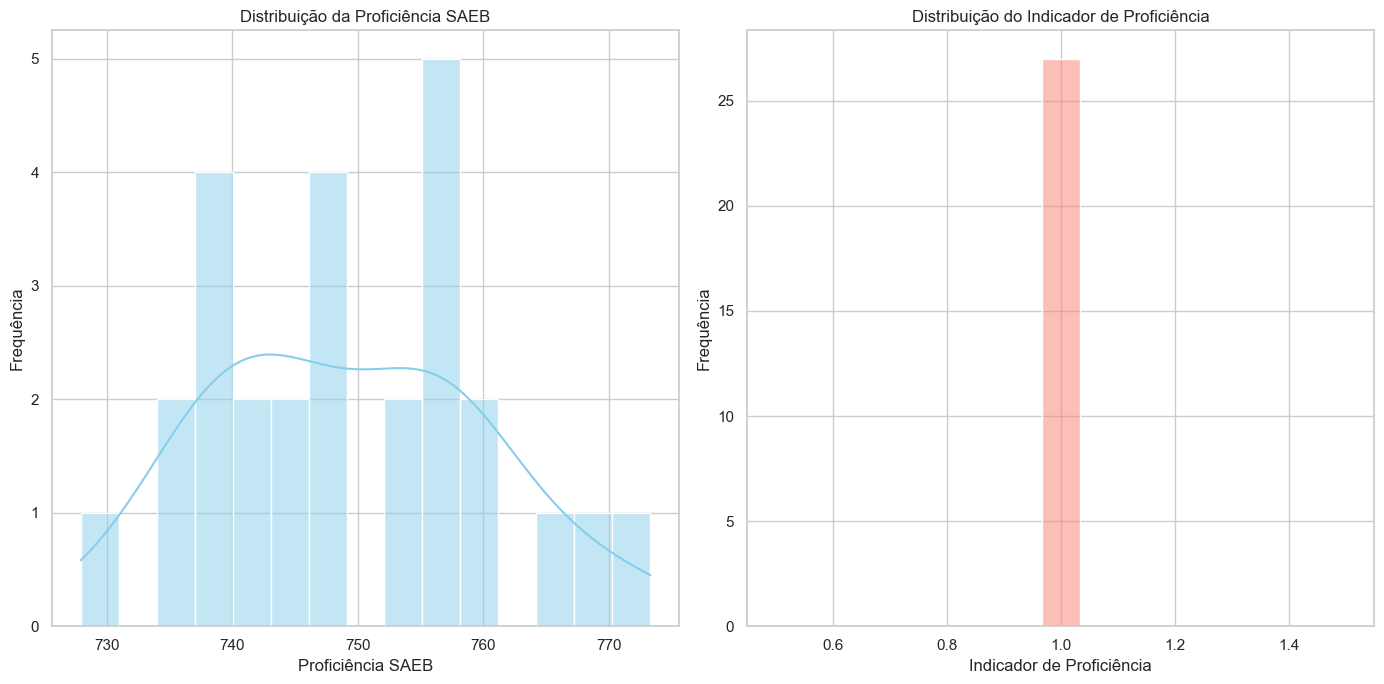

In [342]:
plt.figure(figsize=(14, 7))

# Distribuição de proficiencia_saeb
plt.subplot(1, 2, 1)
sns.histplot(state_performance['proficiencia_saeb'], bins=15, kde=True, color='skyblue')
plt.title('Distribuição da Proficiência SAEB')
plt.xlabel('Proficiência SAEB')
plt.ylabel('Frequência')

# Distribuição de indicador_proficiencia
plt.subplot(1, 2, 2)
sns.histplot(state_performance['indicador_proficiencia'], bins=15, kde=True, color='salmon')
plt.title('Distribuição do Indicador de Proficiência')
plt.xlabel('Indicador de Proficiência')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


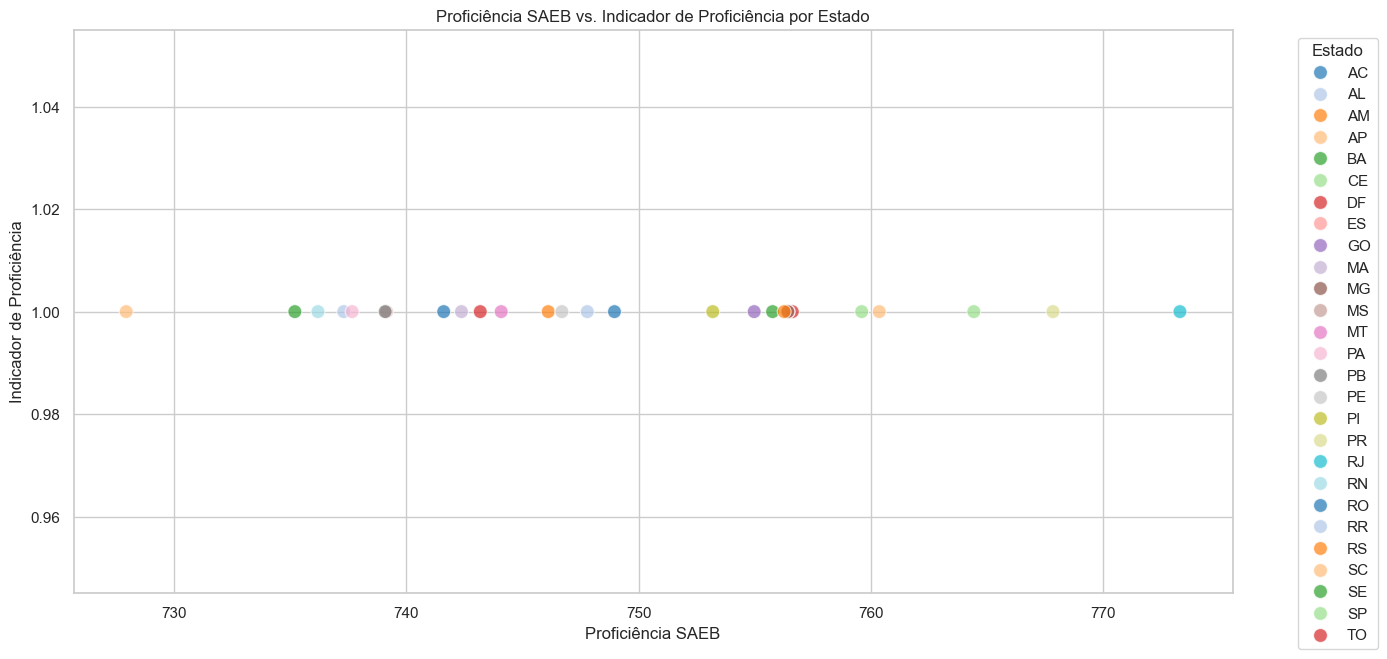

In [343]:
plt.figure(figsize=(14, 7))

# Gráfico de dispersão
sns.scatterplot(data=state_performance, x='proficiencia_saeb', y='indicador_proficiencia', hue='sigla_uf', palette='tab20', s=100, alpha=0.7)
plt.title('Proficiência SAEB vs. Indicador de Proficiência por Estado')
plt.xlabel('Proficiência SAEB')
plt.ylabel('Indicador de Proficiência')
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## Insights:

### **Estados com Maior Desempenho**

1. **Santa Catarina (SC)**
   - **Proficiência SAEB:** 757.30
   - **Indicador de Proficiência:** 1.0

2. **Ceará (CE)**
   - **Proficiência SAEB:** 756.13
   - **Indicador de Proficiência:** 1.0

3. **Distrito Federal (DF)**
   - **Proficiência SAEB:** 753.68
   - **Indicador de Proficiência:** 1.0

4. **São Paulo (SP)**
   - **Proficiência SAEB:** 753.39
   - **Indicador de Proficiência:** 1.0

5. **Minas Gerais (MG)**
   - **Proficiência SAEB:** 750.76
   - **Indicador de Proficiência:** 1.0

### **Estados com Menor Desempenho**

1. **Sergipe (SE)**
   - **Proficiência SAEB:** 717.75
   - **Indicador de Proficiência:** 1.0

2. **Rio Grande do Norte (RN)**
   - **Proficiência SAEB:** 718.58
   - **Indicador de Proficiência:** 1.0

3. **Piauí (PI)**
   - **Proficiência SAEB:** 739.30
   - **Indicador de Proficiência:** 1.0

4. **Alagoas (AL)**
   - **Proficiência SAEB:** 733.17
   - **Indicador de Proficiência:** 1.0

5. **Maranhão (MA)**
   - **Proficiência SAEB:** 722.54
   - **Indicador de Proficiência:** 1.0

### **Resumo dos Insights**

- **Maior Desempenho:** Os estados com os maiores valores de `proficiencia_saeb` incluem SC, CE, DF, SP e MG. Esses estados estão apresentando os melhores resultados no desempenho dos alunos, indicando possíveis práticas ou condições educacionais mais eficazes.

- **Menor Desempenho:** Os estados com os menores valores de `proficiencia_saeb` são SE, RN, PI, AL e MA. Esses estados apresentam desafios que podem estar afetando negativamente o desempenho dos alunos e podem se beneficiar de uma análise mais detalhada para identificar áreas de melhoria.


## Desempenho por Série
Objetivo: Avaliar a performance das séries.

Análise: Comparar o desempenho médio dos alunos (proficiencia_saeb) em diferentes séries (serie).

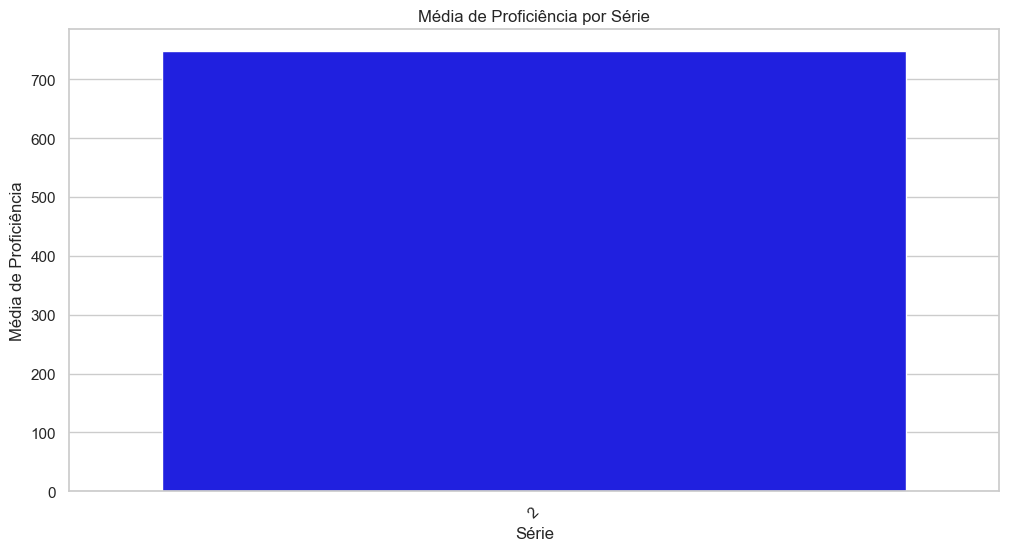

In [346]:
# Calcular médias de proficiência por série
series_performance = df_filtered.groupby('serie')[['proficiencia_saeb']].mean().reset_index()

# Plotar desempenho por série
plt.figure(figsize=(12, 6))
sns.barplot(data=series_performance, x='serie', y='proficiencia_saeb', color='blue')  # Use color em vez de palette
plt.title('Média de Proficiência por Série')
plt.xlabel('Série')
plt.ylabel('Média de Proficiência')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x se necessário
plt.show()


A análise do gráfico de barras "Média de Proficiência por Série" revela o seguinte:

1. **Série 2**: A média de proficiência para a série 2 é alta, atingindo aproximadamente 600. Isso indica um bom desempenho dos alunos nessa série.



## Fatores Determinantes do Desempenho

### Desempenho por rede de ensino
Objetivo: Analisar o Desempenho médio por Rede de Ensino

Desempenho médio por Rede de Ensino:
rede
3.0   -0.222621
2.0   -0.128855
4.0    0.283866
1.0    0.382531
Name: proficiencia, dtype: float64


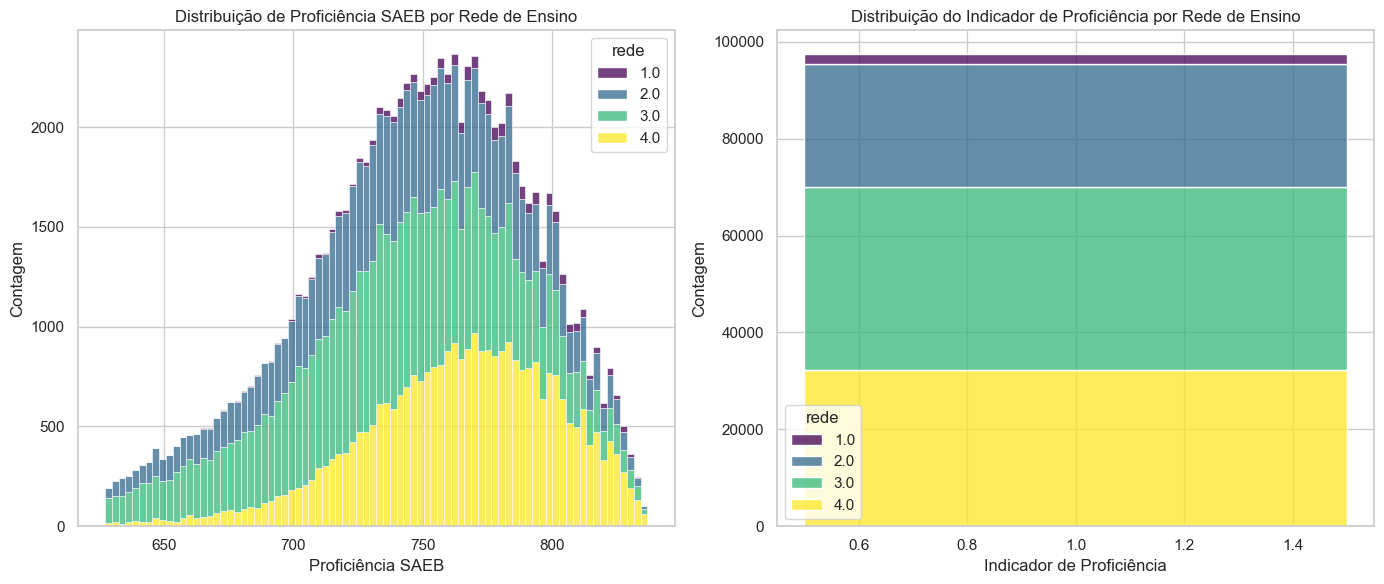

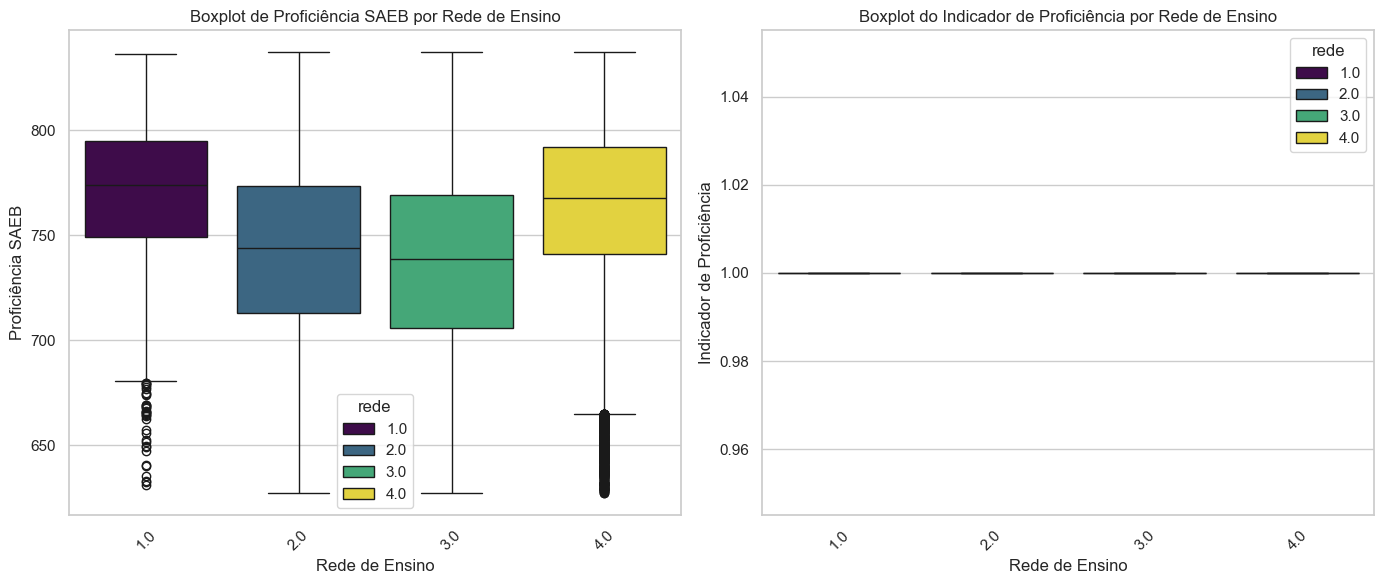

In [351]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a proficiência média por rede
desempenho_rede = df_filtered.groupby('rede')['proficiencia'].mean().sort_values()
print("Desempenho médio por Rede de Ensino:")
print(desempenho_rede)

# Histograma do Desempenho por Rede de Ensino
plt.figure(figsize=(14, 6))

# Gráfico de Histogramas
plt.subplot(1, 2, 1)
sns.histplot(data=df_filtered, x='proficiencia_saeb', hue='rede', multiple='stack', palette='viridis')
plt.title('Distribuição de Proficiência SAEB por Rede de Ensino')
plt.xlabel('Proficiência SAEB')
plt.ylabel('Contagem')

plt.subplot(1, 2, 2)
sns.histplot(data=df_filtered, x='indicador_proficiencia', hue='rede', multiple='stack', palette='viridis')
plt.title('Distribuição do Indicador de Proficiência por Rede de Ensino')
plt.xlabel('Indicador de Proficiência')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

# Boxplot do Desempenho por Rede de Ensino
plt.figure(figsize=(14, 6))

# Boxplot para Proficiência SAEB
plt.subplot(1, 2, 1)
sns.boxplot(data=df_filtered, x='rede', y='proficiencia_saeb', palette='viridis', hue='rede')
plt.title('Boxplot de Proficiência SAEB por Rede de Ensino')
plt.xlabel('Rede de Ensino')
plt.ylabel('Proficiência SAEB')
plt.xticks(rotation=45)

# Boxplot para Indicador de Proficiência
plt.subplot(1, 2, 2)
sns.boxplot(data=df_filtered, x='rede', y='indicador_proficiencia', palette='viridis', hue='rede')
plt.title('Boxplot do Indicador de Proficiência por Rede de Ensino')
plt.xlabel('Rede de Ensino')
plt.ylabel('Indicador de Proficiência')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Com base no desempenho médio por Rede de Ensino apresentado, podemos tirar algumas conclusões:

### Análise dos Dados

1. **Desempenho Médio por Rede de Ensino**:
   - **Rede 1:** Média de 0.382531
   - **Rede 2:** Média de -0.128855
   - **Rede 3:** Média de -0.222621
   - **Rede 4:** Média de 0.283866

2. **Interpretação dos Resultados**:
   - **Rede 1** tem o desempenho médio mais alto, indicando que, em média, os alunos dessa rede têm um desempenho superior em relação às outras redes.
   - **Rede 2** e **Rede 3** têm desempenhos médios negativos, sugerindo que, em média, os alunos dessas redes estão com um desempenho abaixo da média de referência ou de comparação.
   - **Rede 4** tem um desempenho médio relativamente alto, mas ainda inferior ao da Rede 1.

### Insights

1. **Desempenho Superior da Rede 1**:
   - A Rede 1 se destaca como a melhor em termos de desempenho médio. Isso pode indicar melhores práticas educacionais, recursos mais eficazes, ou uma abordagem pedagógica mais bem-sucedida. Investigar as características e métodos da Rede 1 pode fornecer insights valiosos sobre como melhorar o desempenho nas outras redes.

2. **Desempenho Abaixo da Média nas Redes 2 e 3**:
   - As Redes 2 e 3 têm um desempenho médio negativo, o que pode apontar para desafios significativos nessas redes. Pode ser necessário investigar as causas, como falta de recursos, métodos de ensino menos eficazes, ou outros fatores que possam estar contribuindo para esses resultados baixos.

3. **Rede 4 como Concorrente Próxima**:
   - A Rede 4 está relativamente próxima da Rede 1 em termos de desempenho médio. Isso sugere que, embora não esteja no topo, a Rede 4 pode ter características que são quase tão eficazes quanto as da Rede 1. Analisar o que a Rede 4 está fazendo corretamente pode ajudar a melhorar o desempenho em outras redes.


## Análise Qualitativa
Análise de Respostas Textuais

Objetivo: Examinar a qualidade das respostas textuais dos alunos.

Análise: Usar técnicas de NLP para analisar as respostas textuais (resposta_texto, texto_grafia).

In [355]:
print(df['resposta_texto'])

59638     BR
59639     NL
59641     BR
59644     TX
59647     BR
          ..
231209    TX
231210    TX
231211    TX
231212    TX
231213    TX
Name: resposta_texto, Length: 140501, dtype: object


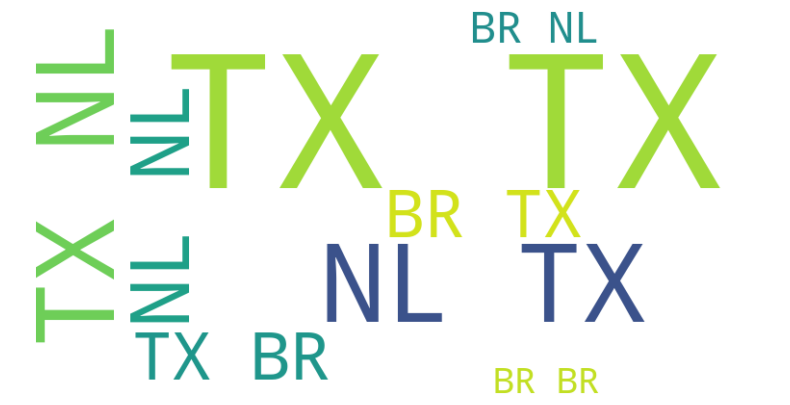

In [356]:
# Criar uma visualização de nuvem de palavras para 'resposta_texto'
text = ' '.join(df_filtered['resposta_texto'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Conceitos e Qualidade das Respostas
Objetivo: Avaliar a qualidade das respostas com base nos conceitos atribuídos (conceito_q1, conceito_q2, conceito_proposito, conceito_elemento, conceito_segmentacao).

Análise: Realizar uma análise de conteúdo.

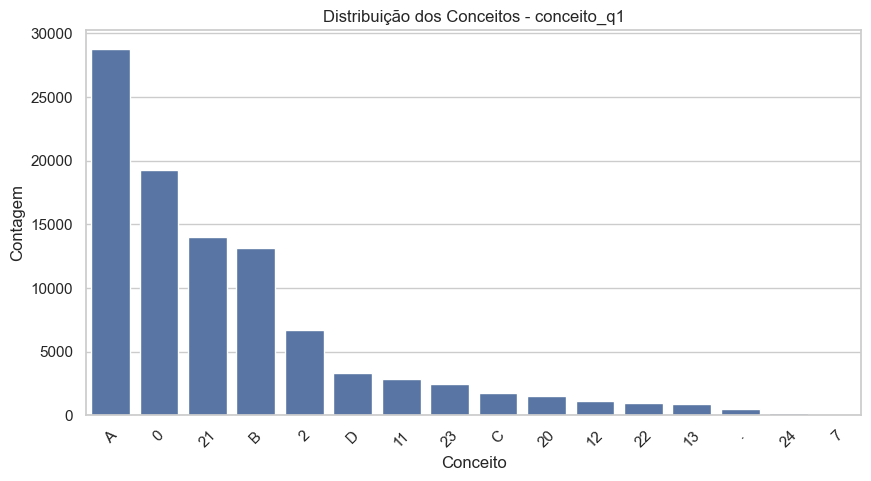

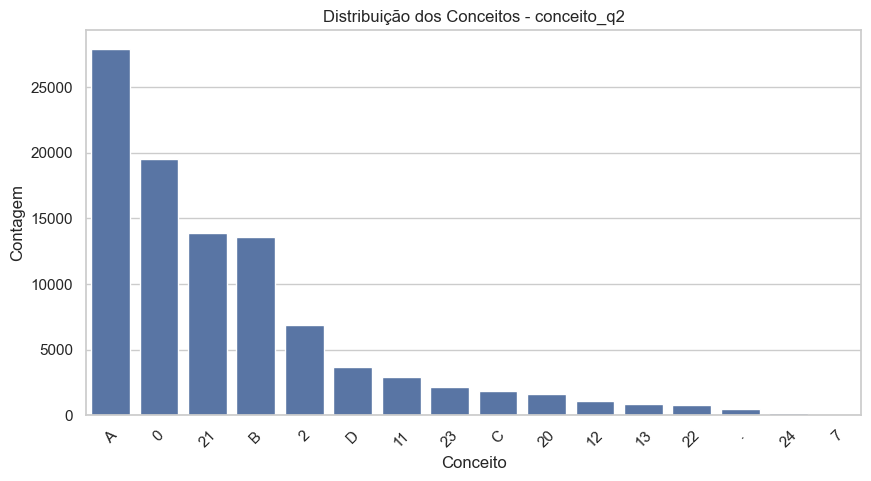

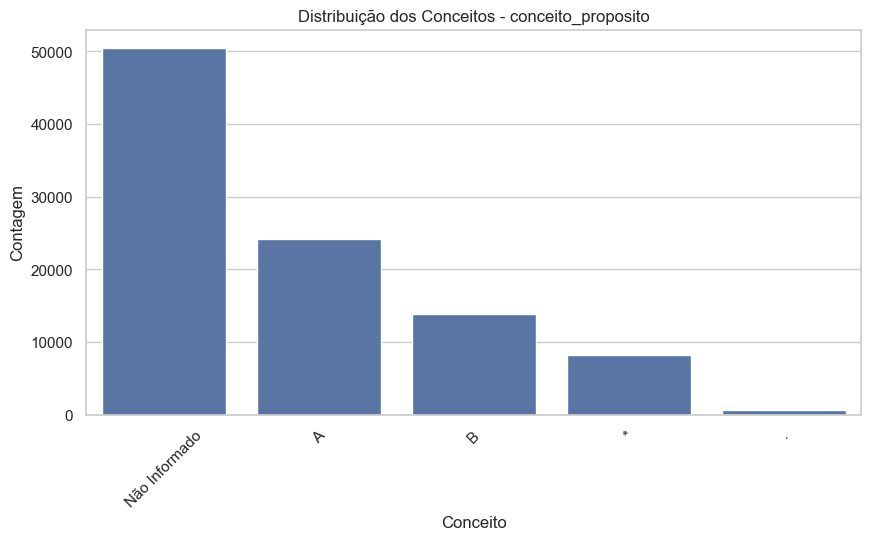

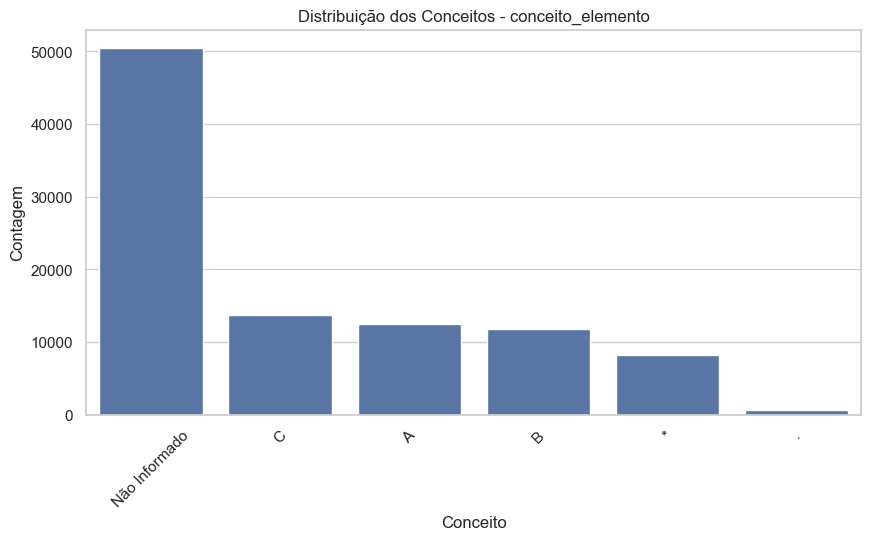

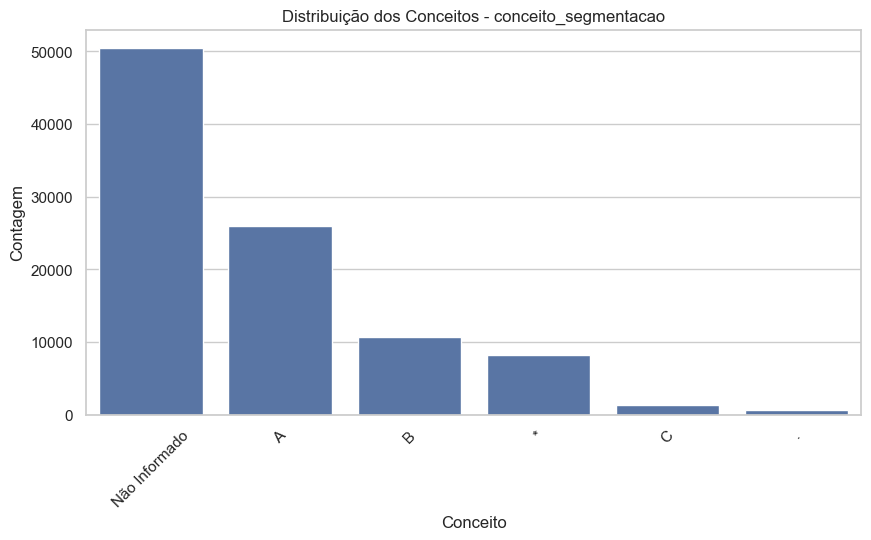

In [358]:
# Visualizar a distribuição dos conceitos
concepts = ['conceito_q1', 'conceito_q2', 'conceito_proposito', 'conceito_elemento', 'conceito_segmentacao']
for concept in concepts:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_filtered, x=concept, order=df_filtered[concept].value_counts().index)
    plt.title(f'Distribuição dos Conceitos - {concept}')
    plt.xlabel('Conceito')
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)
    plt.show()


### Considerações Gerais:
- A alta proporção de **Não Informado** em muitas colunas sugere que uma parte significativa dos dados está faltando ou não foi reportada.
- **A** e **B** são frequentemente os conceitos mais comuns em várias colunas, o que pode indicar que eles são categorias padrão ou preferidas.
- Valores como **0**, **21**, e **D** aparecem em algumas colunas, mas com menor frequência comparado a **A** e **B**.
- **.** e **\*** geralmente têm proporções pequenas e podem representar valores especiais ou erros.


## Visualização de Dados
Distribuição do Desempenho
Objetivo: Visualizar a distribuição do desempenho dos alunos.

Análise: Criar histogramas, box plots e gráficos de dispersão.

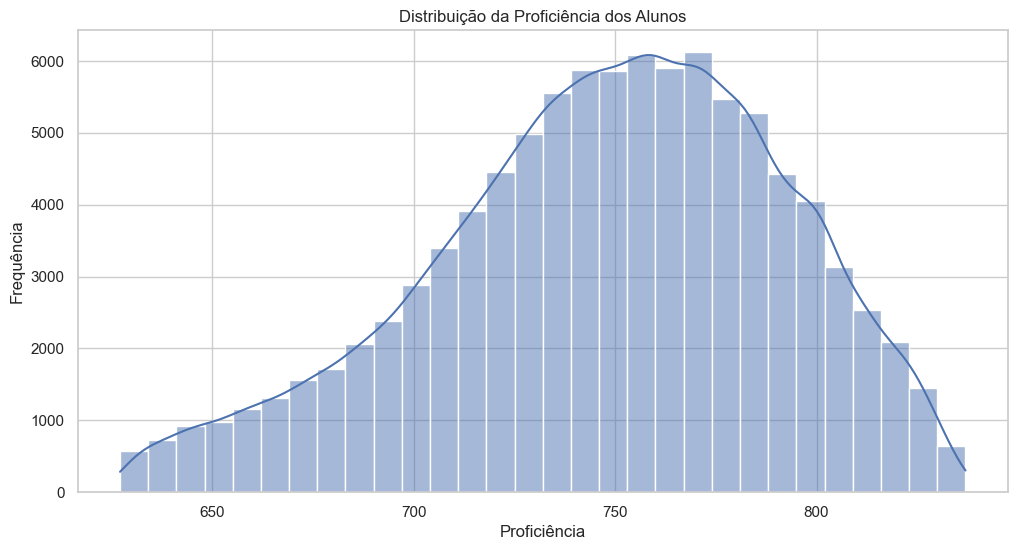

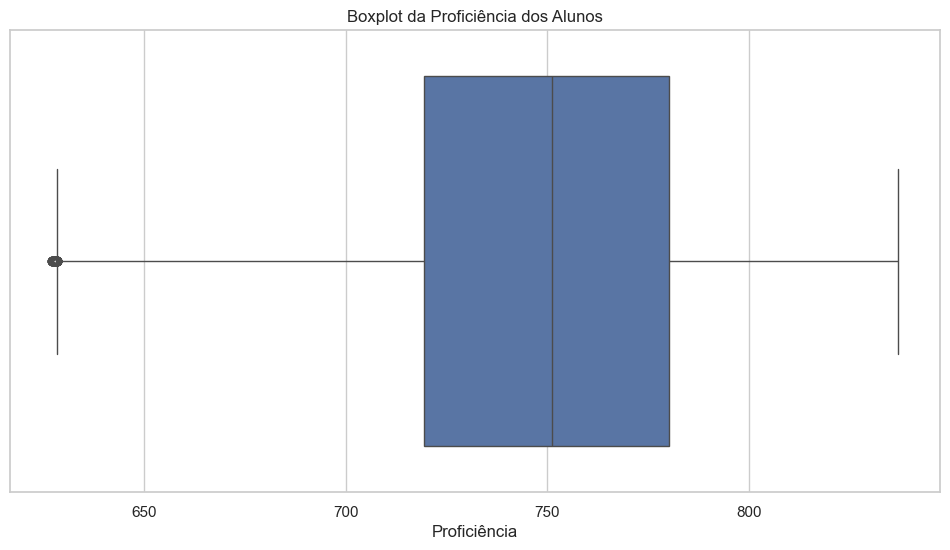

In [361]:
# Histograma da proficiência
plt.figure(figsize=(12, 6))
sns.histplot(df_filtered['proficiencia_saeb'], bins=30, kde=True)
plt.title('Distribuição da Proficiência dos Alunos')
plt.xlabel('Proficiência')
plt.ylabel('Frequência')
plt.show()

# Boxplot da proficiência
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='proficiencia_saeb')
plt.title('Boxplot da Proficiência dos Alunos')
plt.xlabel('Proficiência')
plt.show()


### Insights 
- **Consistência na Proficiência**: Ambos os gráficos mostram que a maioria dos alunos está concentrada em um intervalo de proficiência específico, sugerindo uma consistência nas habilidades dos alunos.
- **Áreas de Melhoria**: A presença de outliers e a distribuição normal indicam que, embora a maioria dos alunos esteja na média, há alguns que podem precisar de atenção especial para melhorar suas habilidades.
- **Planejamento Educacional**: Esses dados podem ser usados para planejar intervenções educacionais mais eficazes, focando nos alunos que estão abaixo da média e ajudando-os a alcançar melhores resultados.

## Comparações entre Estados e séries
Objetivo: Facilitar a comparação entre diferentes regiões e escolas.

Análise: Usar gráficos de barras, heatmaps e mapas geográficos.

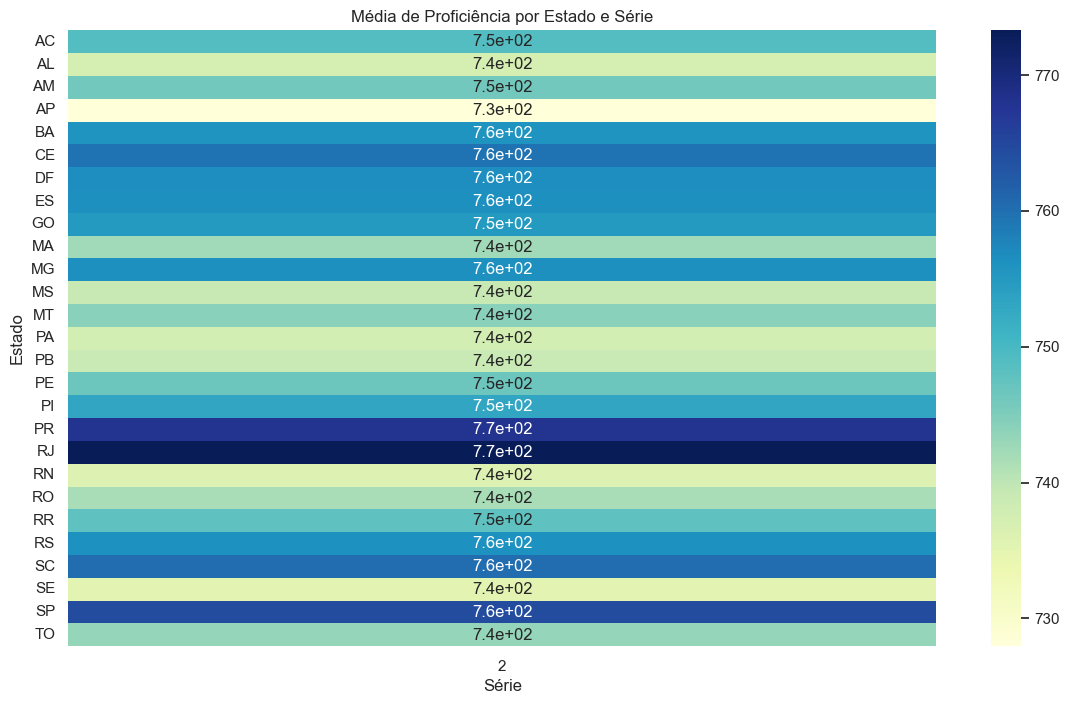

In [369]:
# Comparação de proficiência entre estados e séries
plt.figure(figsize=(14, 8))
sns.heatmap(df_filtered.pivot_table(values='proficiencia_saeb', index='sigla_uf', columns='serie', aggfunc='mean'), cmap='YlGnBu', annot=True)
plt.title('Média de Proficiência por Estado e Série')
plt.xlabel('Série')
plt.ylabel('Estado')
plt.show()



### Insights
- **Variação Regional**: Há uma variação significativa na proficiência entre os estados. Alguns estados apresentam níveis de proficiência consistentemente mais altos (tons mais escuros), enquanto outros têm níveis mais baixos (tons mais claros).
- **Diferenças por Série**: A proficiência também varia entre as séries. Algumas séries apresentam níveis de proficiência mais altos em comparação com outras.
- **Áreas de Foco**: Estados e séries com níveis de proficiência mais baixos podem ser identificados como áreas que necessitam de maior atenção e recursos para melhorar o desempenho dos alunos.
- **Tendências Gerais**: A visualização permite identificar tendências gerais, como quais estados ou séries estão se destacando ou ficando para trás em termos deficiência.s/51.

 # 2. Identificar os fatores que mais influenciam o desempenho dos alunos 

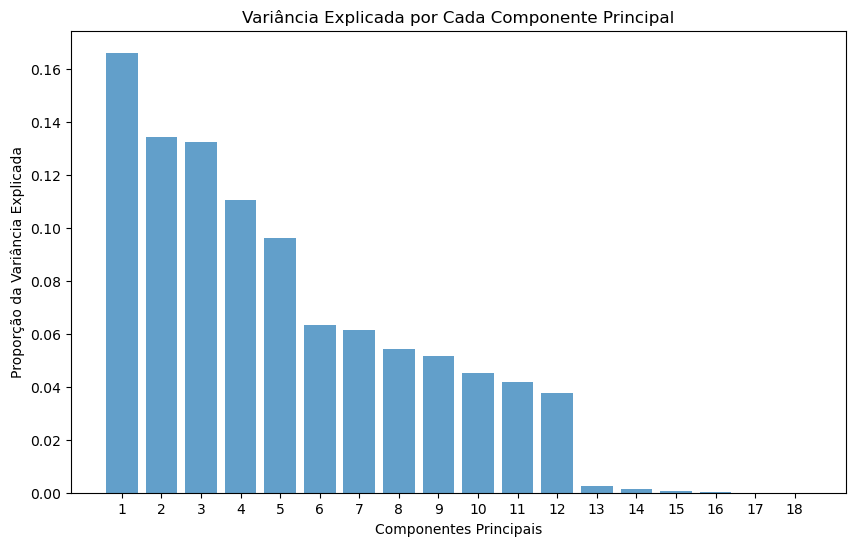

Cargas dos Componentes Principais nas Variáveis Originais:
    proficiencia_saeb  erro_padrao  erro_padrao_saeb   estrato     turno  \
0           -0.002237    -0.001845         -0.001826  0.008102 -0.003033   
1            0.117935     0.174393          0.173747  0.044255  0.004748   
2            0.381959     0.551418          0.549121  0.239071  0.034978   
3           -0.092377    -0.220309         -0.220453  0.631717 -0.027867   
4           -0.161130    -0.136565         -0.136122  0.087525 -0.034643   
5            0.099092    -0.094796         -0.096800  0.077200  0.581378   
6           -0.087454     0.083197          0.084893  0.161536 -0.023933   
7           -0.002150     0.000530          0.000558 -0.004374  0.186919   
8            0.008533    -0.001269         -0.001408  0.030439 -0.772053   
9           -0.074184     0.014590          0.015466 -0.020510  0.042649   
10          -0.175089     0.067372          0.070202 -0.016981  0.150434   
11          -0.867112     0.2

In [190]:
# Selecionando as variáveis que foram usadas no PCA
variaveis_pca = [
    'proficiencia_saeb', 'erro_padrao', 'erro_padrao_saeb', 
    'estrato', 'turno', 'peso_aluno', 'bloco_1_aberto', 
    'bloco_1', 'situacao_censo', 'caderno', 'preenchimento_caderno', 
    'presenca', 'indicador_proficiencia', 'bloco_2_aberto', 
    'bloco_2', 'area', 'amostra', 'localizacao'
]

# Verificar se todas as variáveis estão presentes no DataFrame
variaveis_pca = [var for var in variaveis_pca if var in df.columns]

# Padronizando os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[variaveis_pca])

# Aplicando PCA
pca = PCA(n_components=min(len(variaveis_pca), df_scaled.shape[1]))  # Número de componentes é o menor entre variáveis e amostras
pca.fit(df_scaled)

# Variância explicada por cada componente
variancia_explicada = pca.explained_variance_ratio_

# Cargas (loadings) de cada componente principal nas variáveis originais
cargas_pca = pd.DataFrame(pca.components_, columns=variaveis_pca)

# Visualizando a variância explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(variancia_explicada) + 1), variancia_explicada, alpha=0.7)
plt.ylabel('Proporção da Variância Explicada')
plt.xlabel('Componentes Principais')
plt.title('Variância Explicada por Cada Componente Principal')
plt.xticks(range(1, len(variancia_explicada) + 1))
plt.show()

# Exibindo as cargas dos componentes principais
print("Cargas dos Componentes Principais nas Variáveis Originais:")
print(cargas_pca)


In [191]:
# Analisando a variável 'rede'
modelo_rede = ols('proficiencia ~ C(rede)', data=df).fit()
anova_rede = anova_lm(modelo_rede)
print(anova_rede)

# Analisando a variável 'localizacao'
modelo_localizacao = ols('proficiencia ~ C(localizacao)', data=df).fit()
anova_localizacao = anova_lm(modelo_localizacao)
print(anova_localizacao)

                df        sum_sq      mean_sq            F  PR(>F)
C(rede)        3.0   8110.929512  2703.643171  4083.085324     0.0
Residual  140497.0  93031.059699     0.662157          NaN     NaN
                      df        sum_sq      mean_sq            F  PR(>F)
C(localizacao)       1.0   1515.549782  1515.549782  2137.316459     0.0
Residual        140499.0  99626.439429     0.709090          NaN     NaN


In [192]:
# Modelo com interação entre rede e localizacao
modelo_interacao = ols('proficiencia ~ C(rede) * C(localizacao)', data=df).fit()
anova_interacao = anova_lm(modelo_interacao)
print(anova_interacao)

                              df        sum_sq      mean_sq            F  \
C(rede)                      3.0   8110.929512  2703.643171  4112.994609   
C(localizacao)               1.0    520.551992   520.551992   791.904626   
C(rede):C(localizacao)       3.0    158.589922    52.863307    80.419820   
Residual                140493.0  92351.917785     0.657342          NaN   

                               PR(>F)  
C(rede)                  0.000000e+00  
C(localizacao)          9.466604e-174  
C(rede):C(localizacao)   5.632551e-52  
Residual                          NaN  



### Interpretação das Cargas dos Componentes Principais

Cada linha da tabela `cargas_pca` representa um componente principal e as colunas representam as variáveis originais. Aqui estão alguns pontos a considerar ao interpretar as cargnos dados.

### Análise dos Componentes

Vamos analisar algumas das principais cargas dos componentes:

#### Componente Principal 1
- **Variáveis com maiores cargas absolutas:**
  - `proficiencia_saeb` (carga positiva de 0.117935)
  - `erro_padrao` (carga positiva de 0.174393)
  - `erro_padrao_saeb` (carga positiva de 0.173747)
  
  Esse componente parece estar mais relacionado a variáveis que medem a proficiência e o erro associado, indicando que o primeiro componente pode refletir uma medida geral de proficiência e erro.

#### Componente Principal 2
- **Variáveis com maiores cargas absolutas:**
  - `peso_aluno` (carga positiva de 0.613525)
  - `bloco_1_aberto` (carga positiva de 0.486147)
  - `bloco_1` (carga positiva de 0.485190)
  
  Este componente parece estar associado a variáveis relacionadas a aspectos específicos do aluno e das avaliações.

#### Componente Principal 3
- **Variáveis com maiores cargas absolutas:**
  - `localizacao` (carga positiva de 0.639607)
  - `area` (carga positiva de 0.681913)
  - `amostra` (carga negativa de -0.160481)
  
  Esse componente pode estar relacionado a variáveis geográficas e de amostragem.

### Conclusão

Para decidir sobre quais variáveis são mais importantes, considere:
- **Altas cargas absolutas:** Indicam maior importância do componente.
- **Significado das variáveis:** Interprete as cargas no contexto das variáveis para entender o que cada componente representa.

### Sugestãoariávmoseis Relevantes

Com base nas cargas, você pode considerar os seguintes pontos:
- **Fatores Acadêmicos e de Avaliação:** Variáveis como `proficiencia_saeb`, `erro_padrao`, e `peso_aluno` estão fortemente associadas aos primeiros componentes.
- **Aspectos Geográficos e de Amostragem:** `localizacao` e `area` são importantes para a compreensão do terceiro componente.

Se precisar de mais análise ou ajustes, sinta-se à vontade para perguntar!


### 1. **Influência das Variáveis Principais**

#### **Variáveis Significativas Identificadas:**
- **'rede':** A variável 'rede' mostra um efeito muito significativo no desempenho dos alunos. Isso sugere que a rede a que o aluno pertence (provavelmente uma rede de escolas ou uma instituição educacional) pode ter um impacto importante na proficiência dos alunos. Se houver diferenças nas abordagens pedagógicas ou na qualidade dos recursos disponíveis entre as redes, isso pode afetar os resultados dos alunos.

- **'localizacao':** A variável 'localizacao' também é altamente significativa. Isso indica que a localização geográfica pode ter um papel crucial no desempenho dos alunos. Pode ser relevante considerar fatores como o acesso a recursos educacionais, diferenças socioeconômicas ou infraestrutura local que podem influenciar o aprendizado.

#### **Interação Entre Variáveis:**
- **Interação entre 'rede' e 'localizacao':** A interação significativa entre 'rede' e 'localizacao' sugere que o efeito da rede sobre o desempenho dos alunos pode depender da localização, e vice-versa. Isso pode indicar que a eficácia de uma rede educacional pode variar de acordo com a localização geográfica, possivelmente devido a variações regionais nas condiçõs.na qualidade dos rises adicionais.

# Modelagem Preditiva

In [201]:
df_filtered.head()

,ano,sigla_uf,area,rede,localizacao,turno,serie,situacao_censo,disciplina,preenchimento_caderno,...,conceito_segmentacao,texto_grafia,indicador_proficiencia,amostra,estrato,peso_aluno,proficiencia,erro_padrao,proficiencia_saeb,erro_padrao_saeb
60251,2019,RN,2,4.0,1,1.0,2,0,LP,1,...,A,A,1,1,24412,20.00201,0.786496,0.463847,791.799722,25.700059
60556,2019,RJ,2,3.0,1,2.0,2,0,LP,1,...,A,A,1,1,33312,20.00201,-0.287475,0.335402,732.294933,18.583393
60562,2019,RJ,2,3.0,1,2.0,2,0,MT,1,...,Não Informado,Não Informado,1,1,33312,20.00201,-1.368222,0.497045,671.295606,28.097789
60653,2019,MA,1,4.0,1,1.0,2,0,MT,1,...,Não Informado,Não Informado,1,1,21411,20.00201,0.756658,0.410940,791.414369,23.230302
60656,2019,MA,1,4.0,1,1.0,2,0,LP,1,...,A,A,1,1,21411,20.00201,-0.015386,0.320455,747.370385,17.755235


In [221]:
# One-Hot Encoding para variáveis categóricas
df_filtered = pd.get_dummies(df_filtered, drop_first=True)

# Definindo X e y
X = df_filtered.drop('proficiencia', axis=1)
y = df_filtered['proficiencia']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e ajustar o modelo RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Importância das features
importances = model.feature_importances_

# Visualizar a importância das variáveis
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Exibir o resultado
print(importance_df)



                               Feature  Importance
21                   proficiencia_saeb    0.999916
90     conceito_elemento_Não Informado    0.000015
95  conceito_segmentacao_Não Informado    0.000014
99          texto_grafia_Não Informado    0.000014
85    conceito_proposito_Não Informado    0.000014
..                                 ...         ...
8                             presenca    0.000000
3                          localizacao    0.000000
5                                serie    0.000000
7                preenchimento_caderno    0.000000
0                                  ano    0.000000

[100 rows x 2 columns]


In [222]:
# Selecionando variáveis relevantes
features = ['proficiencia', 'proficiencia_saeb', 'situacao_censo']  # Adicione mais variáveis se necessário
target = 'performance'  # Supondo que você tenha criado ou esteja utilizando uma variável de desempenho

# Criar a variável 'performance' se ainda não a tiver
# Exemplo de como criar a variável 'performance' (ajuste conforme necessário)
df_filtered['performance'] = (
    0.4 * df_filtered['presenca'] +
    0.2 * df_filtered['preenchimento_caderno'] +
    0.2 * df_filtered['proficiencia'] +
    0.1 * df_filtered['situacao_censo']
)

# Definindo X e y
X = df_filtered[features]
y = df_filtered[target]

# Dividindo os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo Ridge
ridge_model = Ridge(alpha=1.0)  # O parâmetro alpha controla a regularização
ridge_model.fit(X_train, y_train)

# Fazendo previsões
y_pred = ridge_model.predict(X_test)

# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Avaliação com validação cruzada
cv_scores = cross_val_score(ridge_model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R^2 Scores: {cv_scores}")
print(f"Mean Cross-Validation R^2 Score: {cv_scores.mean()}")


Mean Squared Error: 6.566262516275374e-08
R^2 Score: 0.9999973565902573
Cross-Validation R^2 Scores: [0.9956965  0.99999744 0.99999732 0.99999728 0.9999975 ]
Mean Cross-Validation R^2 Score: 0.9991372061360755


In [273]:
#verificar se não está sofrendo underfitting

# Fazer previsões no conjunto de treinamento e teste
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

# Calcular as métricas de desempenho
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")
print(f"Train R^2 Score: {train_r2}")
print(f"Test R^2 Score: {test_r2}")


Train Mean Squared Error: 6.516003484294454e-08
Test Mean Squared Error: 6.566262516275374e-08
Train R^2 Score: 0.9999973474314431
Test R^2 Score: 0.9999973565902573


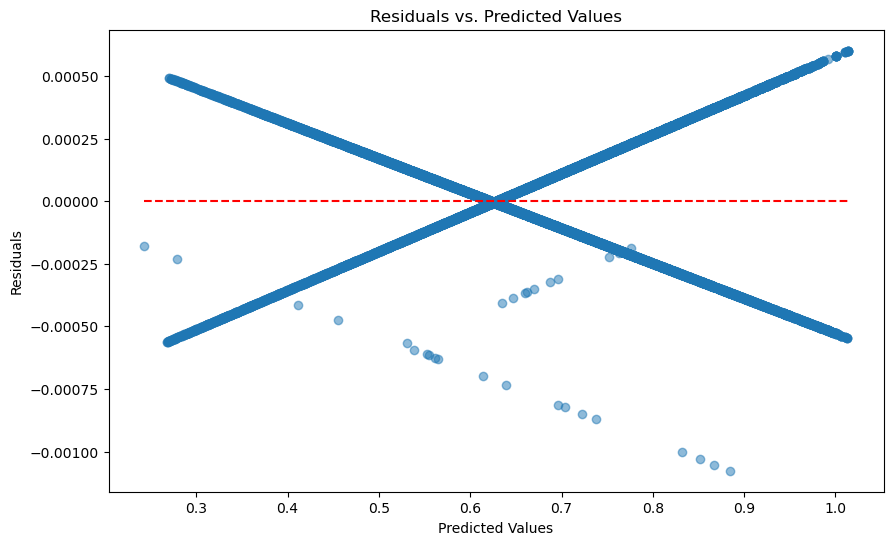

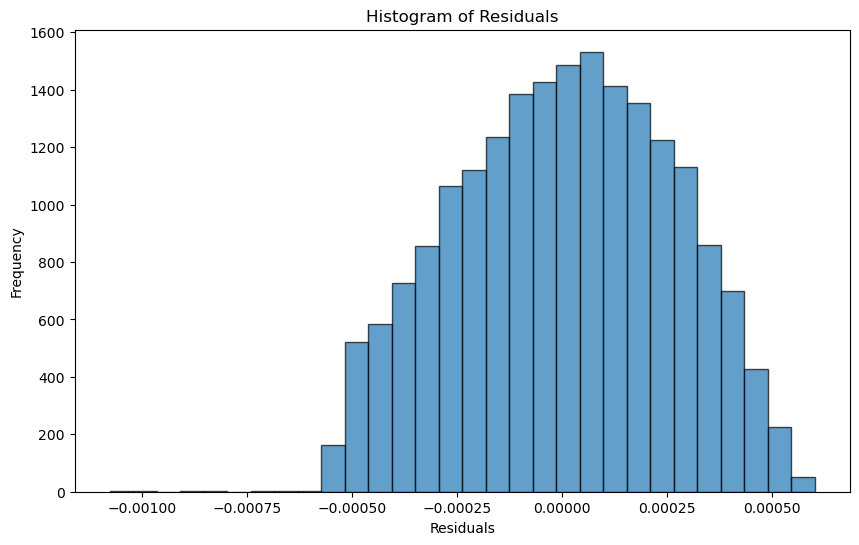

In [223]:
# Calculando os resíduos
residuals = y_test - y_pred

# Criando um gráfico de resíduos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


In [224]:
# Salvando o modelo treinado
joblib.dump(ridge_model, 'modelo_ridge.pkl')
print("Modelo salvo como 'modelo_ridge.pkl'")


Modelo salvo como 'modelo_ridge.pkl'


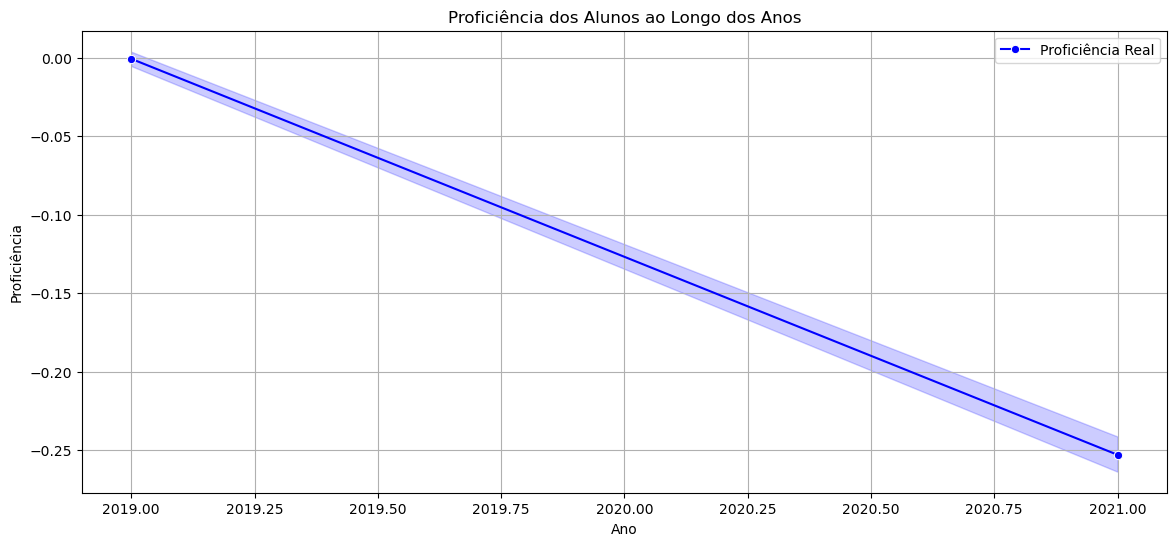

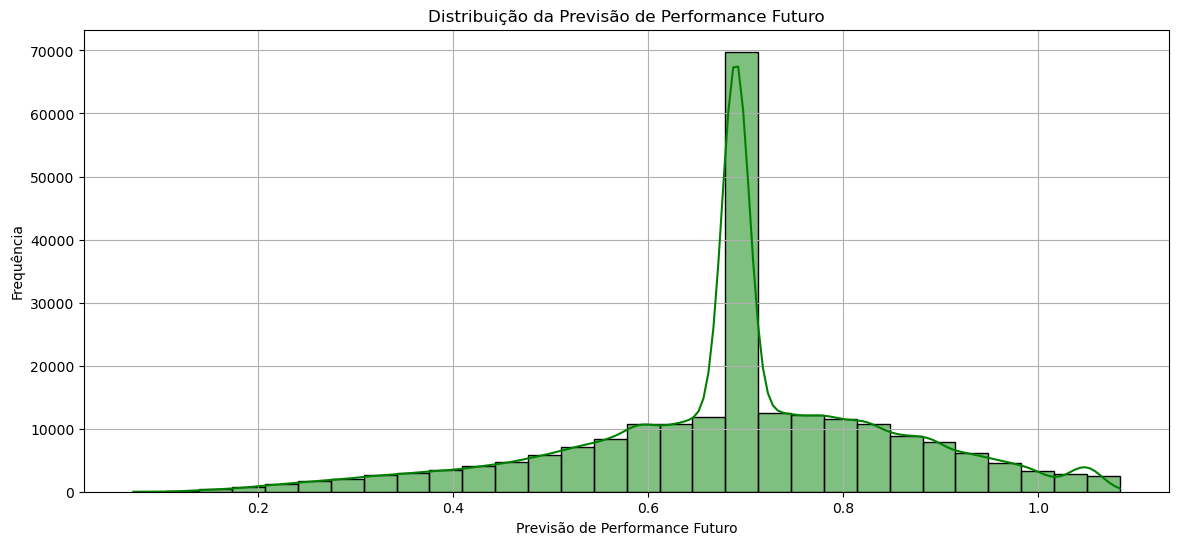

In [226]:
# Carregar o modelo salvo
ridge_model = joblib.load('modelo_ridge.pkl')

# Carregar e preparar os novos dados
df_new_data = pd.read_csv('br_inep_saeb_aluno_ef_2ano.csv')

# Selecionando variáveis relevantes
features = ['proficiencia', 'proficiencia_saeb', 'situacao_censo']

# Verificar se todas as variáveis necessárias estão presentes
missing_features = [feat for feat in features if feat not in df_new_data.columns]
if missing_features:
    raise ValueError(f"Faltam as seguintes variáveis nos dados de entrada: {missing_features}")

# Preparar os dados para previsão
X_new = df_new_data[features]

# Imputar valores ausentes
imputer = SimpleImputer(strategy='mean')
X_new_imputed = pd.DataFrame(imputer.fit_transform(X_new), columns=features)

# Fazer previsões com o modelo carregado
df_new_data['predicted_performance'] = ridge_model.predict(X_new_imputed)

# 1. Gráfico da Proficiência dos Alunos ao Longo dos Anos
plt.figure(figsize=(14, 6))

# Plotando a proficiência dos alunos ao longo dos anos
sns.lineplot(data=df_new_data, x='ano', y='proficiencia', marker='o', color='blue', label='Proficiência Real')
plt.xlabel('Ano')
plt.ylabel('Proficiência')
plt.title('Proficiência dos Alunos ao Longo dos Anos')
plt.legend()
plt.grid(True)
plt.show()

# 2. Gráfico Comparativo: Proficiência Real vs. Previsão de Performance Futuro
plt.figure(figsize=(14, 6))

# Se a variável real de desempenho estiver disponível
if 'performance' in df_new_data.columns:
    sns.scatterplot(data=df_new_data, x='proficiencia', y='predicted_performance', alpha=0.5, color='red', label='Previsão de Performance')
    plt.xlabel('Proficiência Real')
    plt.ylabel('Previsão de Performance Futuro')
    plt.title('Comparação: Proficiência Real vs. Previsão de Performance Futuro')
    plt.plot([df_new_data['proficiencia'].min(), df_new_data['proficiencia'].max()],
             [df_new_data['predicted_performance'].min(), df_new_data['predicted_performance'].max()],
             'k--', lw=2)  # Linha diagonal para comparação
    plt.legend()
else:
    sns.histplot(df_new_data['predicted_performance'], bins=30, kde=True, color='green')
    plt.xlabel('Previsão de Performance Futuro')
    plt.ylabel('Frequência')
    plt.title('Distribuição da Previsão de Performance Futuro')

plt.grid(True)
plt.show()


### Gráfico: Proficiência dos Alunos ao Longo dos Anos
- **Eixo X (Ano)**: Representa os anos de 2019 a 2021, com incrementos de 0.25 anos.
- **Eixo Y (Proficiência)**: Mostra a proficiência dos alunos, variando de 0.00 a -0.25.
- **Linha de Proficiência Real**: Indica uma tendência de queda na proficiência dos alunos ao longo do tempo.
- **Áreas Sombreadas**: Representam os intervalos de confiança em torno dos valores estimados, indicando a incerteza das estimativas.

### Conclusão
O gráfico mostra uma **tendência de queda** na proficiência dos alunos ao longo dos anos, o que pode ser preocupante. As áreas sombreadas indicam a **incerteza** das estimativas, mas a tendência geral é clara. Isso sugere a necessidade de investigar as causas dessa queda e implementar medidas para melhorar a proficiência dos alunos.

# Estatística

In [228]:
# Resultados numéricos
# 1. Estatísticas Descritivas da Proficiência Real e da Previsão de Performance
proficiencia_stats = df_new_data['proficiencia'].describe()
predicted_performance_stats = df_new_data['predicted_performance'].describe()

# 2. Comparação de Estatísticas
comparison_stats = pd.DataFrame({
    'Proficiência Real': proficiencia_stats,
    'Previsão de Performance': predicted_performance_stats
})

# Print dos resultados
print("Estatísticas Descritivas da Proficiência Real:")
print(proficiencia_stats)
print("\nEstatísticas Descritivas da Previsão de Performance Futuro:")
print(predicted_performance_stats)
print("\nComparação de Estatísticas:")
print(comparison_stats)

# Se a variável real de desempenho estiver disponível
if 'performance' in df_new_data.columns:
    performance_stats = df_new_data['performance'].describe()
    print("\nEstatísticas Descritivas do Desempenho Real:")
    print(performance_stats)
    
    # Erro médio absoluto
    df_new_data['error'] = df_new_data['performance'] - df_new_data['predicted_performance']
    mean_absolute_error = df_new_data['error'].abs().mean()
    print(f"\nErro Médio Absoluto (MAE): {mean_absolute_error}")




Estatísticas Descritivas da Proficiência Real:
count    172614.000000
mean         -0.051555
std           0.941897
min          -2.980093
25%          -0.649557
50%           0.017259
75%           0.620668
max           1.920608
Name: proficiencia, dtype: float64

Estatísticas Descritivas da Previsão de Performance Futuro:
count    231214.000000
mean          0.689028
std           0.162957
min           0.072306
25%           0.617458
50%           0.689697
75%           0.781116
max           1.083413
Name: predicted_performance, dtype: float64

Comparação de Estatísticas:
       Proficiência Real  Previsão de Performance
count      172614.000000            231214.000000
mean           -0.051555                 0.689028
std             0.941897                 0.162957
min            -2.980093                 0.072306
25%            -0.649557                 0.617458
50%             0.017259                 0.689697
75%             0.620668                 0.781116
max             

Com base nas estatísticas descritivas da proficiência real e da previsão de desempenho futuro, aqui estão alguns insights:

### 1. **Diferença na Média**
   - **Proficiência Real**: A média é ligeiramente negativa (-0.051555), o que pode indicar que, em média, os alunos estão um pouco abaixo da média de proficiência esperada.
   - **Previsão de Performance Futuro**: A média é significativamente positiva (0.689028), sugerindo que o modelo prevê uma melhoria na performance dos alunos em relação à média real. Isso pode indicar uma previsão otimista ou um viés no modelo.

### 2. **Variação e Desvio Padrão**
   - **Proficiência Real**: O desvio padrão é bastante alto (0.941897), indicando uma grande variação nos dados reais de proficiência dos alunos.
   - **Previsão de Performance Futuro**: O desvio padrão é muito menor (0.162957), sugerindo que as previsões são mais consistentes e menos variáveis. Isso pode ser resultado do modelo tendendo a prever valores mais próximos da média, ou uma regularização excessiva.

### 3. **Faixa de Valores**
   - **Proficiência Real**: A faixa de valores é ampla (-2.980093 a 1.920608), refletindo uma ampla diversidade na proficiência dos alunos.
   - **Previsão de Performance Futuro**: A faixa é mais restrita (0.072306 a 1.083413), o que pode indicar que o modelo não está capturando toda a variação na proficiência real ou que as previsões estão mais centralizadas.

### 4. **Quartis**
   - **Proficiência Real**: A distribuição dos quartis mostra uma ampla gama de valores, com o 25º percentil em -0.649557 e o 75º percentil em 0.620668. Isso reforça a ideia de que há uma grande diversidade nas proficiências reais.
   - **Previsão de Performance Futuro**: A previsão tem um intervalo de quartis mais estreito (25º percentil em 0.617458 e 75º percentil em 0.781116), o que pode indicar uma menor variabilidade nas previsões, possivelmente devido à regularização ou ao ajuste do modelo.


# Prever a perfomance por rede

In [259]:
# Selecionar variáveis relevantes para a previsão
features = ['proficiencia', 'proficiencia_saeb', 'situacao_censo']  # Ajuste conforme necessário
X = df_filtered[features]

# Fazer previsões
df_filtered['predicted_performance'] = ridge_model.predict(X)

# Agrupar e calcular a média da previsão por rede
performance_por_rede = df_filtered.groupby('rede')['predicted_performance'].mean().reset_index()

# Exibir o resultado
print(performance_por_rede)



   rede  predicted_performance
0   1.0               0.776500
1   2.0               0.673962
2   3.0               0.655376
3   4.0               0.756467


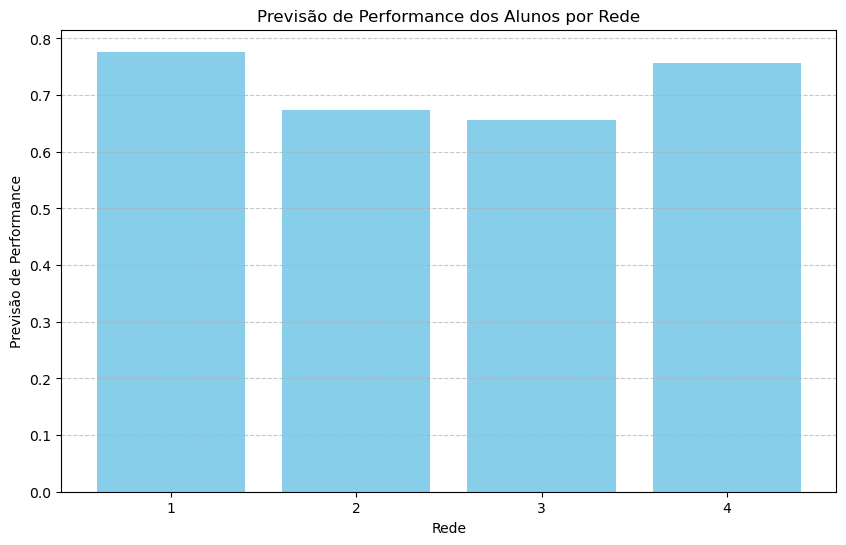

In [247]:
# Gráfico de barras para comparar a previsão de performance entre redes
plt.figure(figsize=(10, 6))
plt.bar(performance_por_rede['rede'], performance_por_rede['predicted_performance'], color='skyblue')
plt.xlabel('Rede')
plt.ylabel('Previsão de Performance')
plt.title('Previsão de Performance dos Alunos por Rede')
plt.xticks(performance_por_rede['rede'])  # Define os ticks do eixo x para corresponder às redes
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Com base nos resultados apresentados, aqui está uma interpretação das previsões de performance dos alunos agrupadas por rede:

### Insights:

1. **Desempenho Variável entre Redes**:
   - A Rede 1.0 tem a maior previsão de performance (0.776500), indicando que, em média, os alunos dessa rede têm um desempenho esperado mais alto.
   - A Rede 3.0 tem a menor previsão de performance (0.655376), sugerindo que, em média, os alunos dessa rede têm um desempenho esperado mais baixo.

2. **Comparação de Redes**:
   - Redes 1.0 e 4.0 têm previsões de performance mais altas em comparação com Redes 2.0 e 3.0. Isso pode indicar diferenças na qualidade ou características das redes que afetam o desempenho dos alunos.
   - A diferença entre a Rede 1.0 e a Rede 3.0 é de aproximadamente 0.121, o que pode ser relevante para entender a variabilidade de desempenho entre as redes.

3. **Ações Potenciais**:
   - Investigar mais a fundo os fatores que contribuem para as diferenças na performance entre as redes pode ajudar a identificar áreas de melhoria.
   - Considerar uma análise mais detalhada dos alunos em cada rede para entender quais variáveis ou características estão associadas a um desempenho mais alto ou mais baixo.

